# **SC1015 Project - Team 4 (FDAE)**


In [ ]:
# Import essential libraries and csv file used for exploratory data analysis:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string

sb.set() # set the default Seaborn style for graphics

In [ ]:
medIn = pd.read_csv("https://raw.githubusercontent.com/KehJingXiang/SC1015-FDAE-Team4/main/medical_insurance.csv")
medIn.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
# Check statistics of the dataset using the type and shape attributes:

print("Data type : ", type(medIn))
print("Data dims : ", medIn.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2772, 7)


In [ ]:
# Check the variables (and their types) in the dataset using the dtypes attribute:

print(medIn.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# Separating numeric data from original data:

intandfloat = medIn.select_dtypes(include = ['int64', 'float64'])

In [ ]:
# Obtaining correlation between numeric data before cleaning:

intandfloat.corr()

age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000

---

## **Data Cleaning**



In [ ]:
# Checking for null values

medIn.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values.

We proceed to remove outliers in 'charges' (abnormally high or abnormally low) so as to have a better prediction.

<Axes: xlabel='charges'>

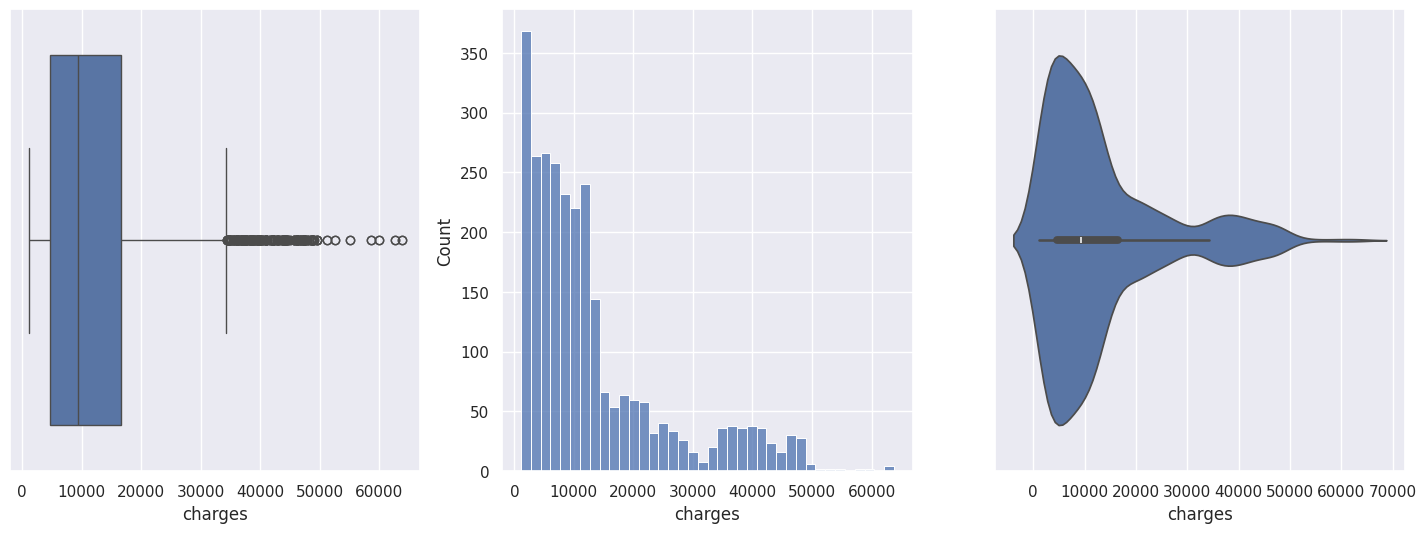

In [ ]:
# Draw the distributions of charges

f, axes = plt.subplots(1, 3, figsize=(18, 6))

sb.boxplot(data = medIn['charges'], orient = "h", ax = axes[0])
sb.histplot(data = medIn['charges'], ax = axes[1])
sb.violinplot(data = medIn['charges'], orient = "h", ax = axes[2])


In [ ]:
medIn['charges'].describe()

count     2772.000000
mean     13261.369959
std      12151.768945
min       1121.873900
25%       4687.797000
50%       9333.014350
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64

In [ ]:
print("Outliers:", ((medIn['charges'] >50000).sum(), "Skewness:", medIn['charges'].skew().round(2)))
print("Data dims: ", medIn.shape)

Outliers: (14, 'Skewness:', 1.51)
Data dims:  (2772, 7)


We decided to only remove outliers of charges>50000 as there are a significant number of outliers beyond the whiskers, and removing them will result in overcleaning and loss of important data.


We found that charges above 50000 up till approximately 63770 would affect the analysis of the data to a considerable extent. These points accounted for 14 data points out of 2772 data points, which does not speak for the general trend of the data. As such, these anomalies were removed.


In [ ]:
medIn_cleaned = medIn.copy()

medIn_cleaned = medIn_cleaned[medIn_cleaned['charges'] <= 50000]

print("Outliers:", ((medIn_cleaned['charges'] >50000)).sum(), "Skewness:", medIn_cleaned['charges'].skew().round(2))
print("Data dims for cleaned data: ", medIn_cleaned.shape)

Outliers: 0 Skewness: 1.45
Data dims for cleaned data:  (2758, 7)


In [ ]:
medIn_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
print("Data dims for cleaned data: ", medIn_cleaned.shape)

Data dims for cleaned data:  (2758, 7)


In [ ]:
weightstatus = []
for i in medIn_cleaned['bmi']:
    if i < 18.5:
        weightstatus.append(0) # underweight
    elif i >= 18.5 and i <= 24.9:
        weightstatus.append(1) # acceptable
    elif i > 24.9 and i <= 29.9:
        weightstatus.append(2) # overweight
    else:
        weightstatus.append(3) # obesity

medIn_cleaned.insert(3, "healthyweight", weightstatus)

In [ ]:
smokerstatus = []
for i in medIn_cleaned['smoker']:
    if i == 'yes':
        smokerstatus.append(1) # smoker
    else:
        smokerstatus.append(0) # nonsmoker

medIn_cleaned.insert(6, "smokerstatus", smokerstatus)

We added 2 new columns, '**smokerstatus**' and '**healthyweight**', which adapts the information in the original columns 'smoker' and 'bmi' respectively.

1. smokerstatus
- 0 represents non-smoker
- 1 represents smoker


2. healthyweight
- 0 suggests underweight (BMI<18.5)
- 1 suggests healthy weight (18.5≤BMI≤24.9)
- 2 suggests overweight (24.9<BMI≤29.9)
- 3 suggests obesity (BMI>29.9)

This is because the exact BMI value itself does not speak strongly about one's health status, but instead the state of heath that BMI suggest gives a clearer idea. As such, we replaced them 0, 1, 2, and 3, which still maintains the continuous nature of the data.

This allows a clear and continuous representation of data.

In [ ]:
medIn_cleaned.head()

age     sex     bmi  healthyweight  children smoker  smokerstatus  \
0   19  female  27.900              2         0    yes             1   
1   18    male  33.770              3         1     no             0   
2   28    male  33.000              3         3     no             0   
3   33    male  22.705              1         0     no             0   
4   32    male  28.880              2         0     no             0   

      region      charges  
0  southwest  16884.92400  
1  southeast   1725.55230  
2  southeast   4449.46200  
3  northwest  21984.47061  
4  northwest   3866.85520

---

## **Exploratory Data Analysis**



### **Looking at numeric data:**




In [ ]:
# Summary Statistics for all numeric variables

intandfloat_cleaned = pd.DataFrame(medIn_cleaned[['age', 'healthyweight', 'charges', 'children']])

intandfloat_cleaned.describe().round(2)

age  healthyweight   charges  children
count  2758.00        2758.00   2758.00   2758.00
mean     39.09           2.34  13035.81      1.10
std      14.09           0.81  11757.34      1.22
min      18.00           0.00   1121.87      0.00
25%      26.00           2.00   4676.64      0.00
50%      39.00           3.00   9288.03      1.00
75%      51.00           3.00  16281.60      2.00
max      64.00           3.00  49577.66      5.00

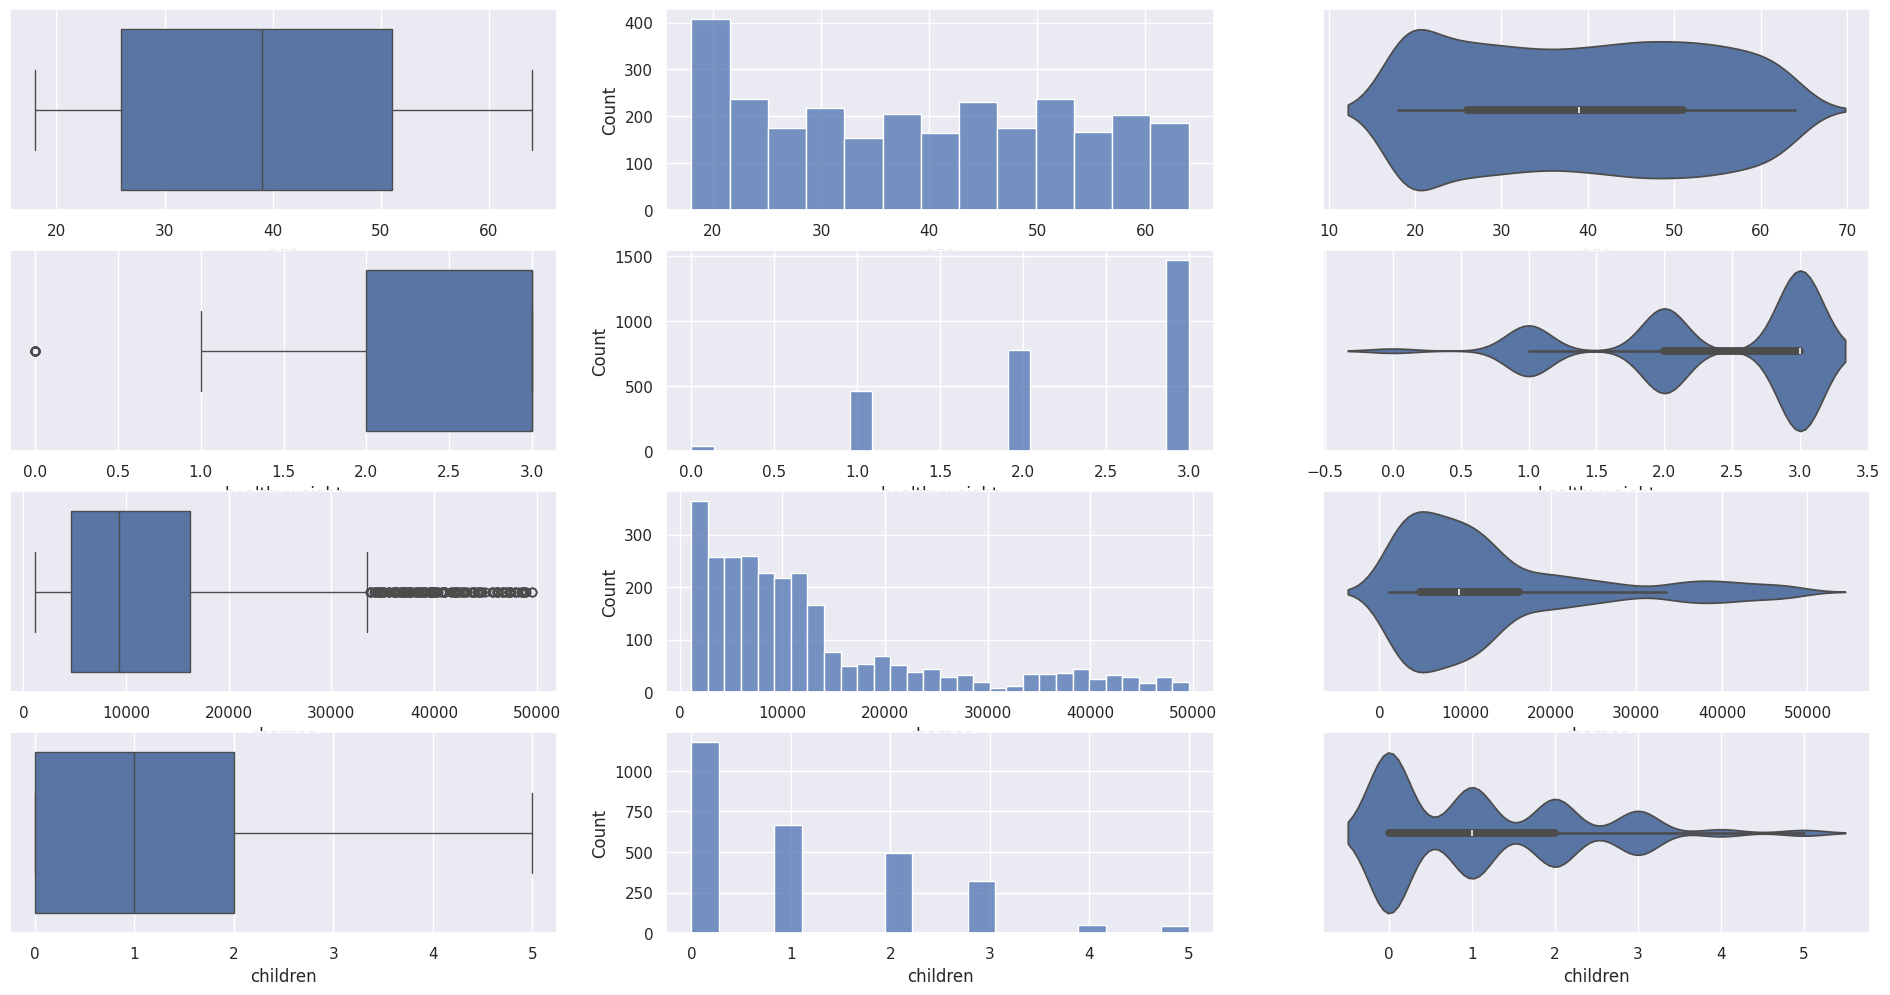

In [ ]:
# Draw the distributions of all numeric variables

f, axes = plt.subplots(4, 3, figsize=(24, 12))

count = 0
for var in intandfloat_cleaned:
    sb.boxplot(data = intandfloat_cleaned[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = intandfloat_cleaned[var], ax = axes[count,1])
    sb.violinplot(data = intandfloat_cleaned[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Correlation Matrix

intandfloat_cleaned.corr()

age  healthyweight   charges  children
age            1.000000       0.112275  0.303780  0.038270
healthyweight  0.112275       1.000000  0.180561 -0.010463
charges        0.303780       0.180561  1.000000  0.075070
children       0.038270      -0.010463  0.075070  1.000000

<Axes: >

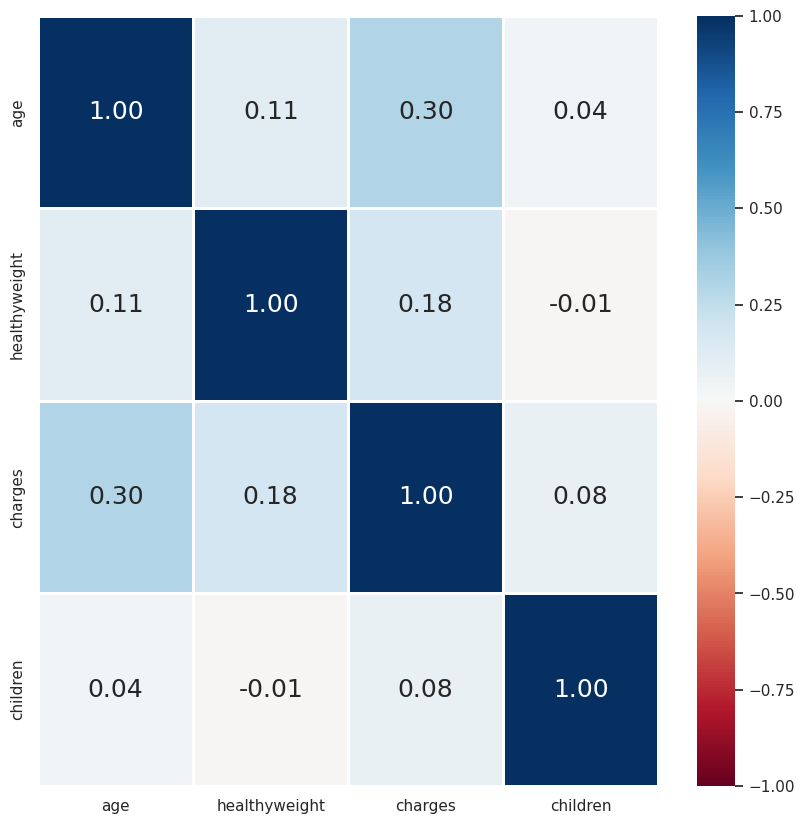

In [ ]:
# Heatmap of the Correlation Matrix

f = plt.figure(figsize=(10, 10))
sb.heatmap(intandfloat_cleaned.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

We observe the highest correlation between charges and age, at 0.30 \(moderate positive correlation\).  



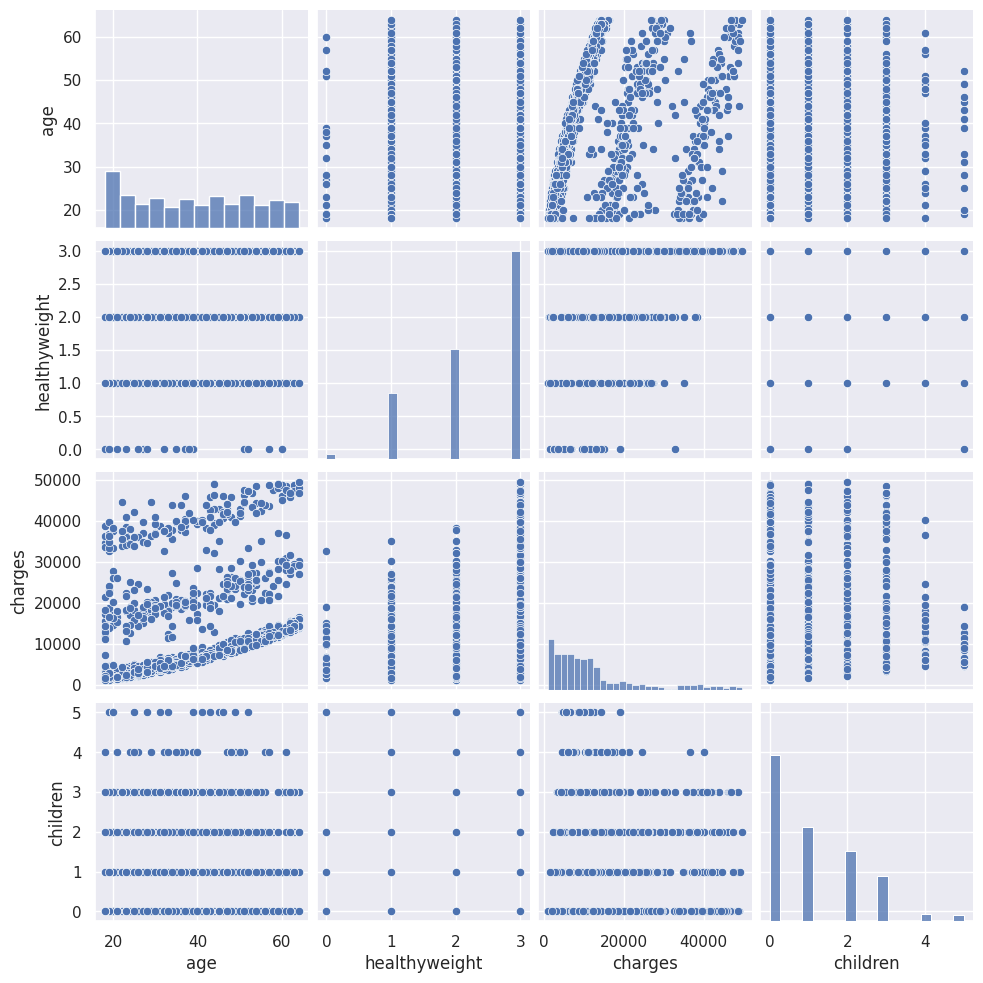

In [ ]:
# Draw pairs of variables against one another

sb.pairplot(data = intandfloat_cleaned)

### **Looking at categorical data**


In [ ]:
print(medIn_cleaned.head())

   age     sex     bmi  healthyweight  children smoker  smokerstatus  \
0   19  female  27.900              2         0    yes             1   
1   18    male  33.770              3         1     no             0   
2   28    male  33.000              3         3     no             0   
3   33    male  22.705              1         0     no             0   
4   32    male  28.880              2         0     no             0   

      region      charges  
0  southwest  16884.92400  
1  southeast   1725.55230  
2  southeast   4449.46200  
3  northwest  21984.47061  
4  northwest   3866.85520  


In [ ]:
medIn_cleaned['sex'].value_counts()

sex
male      1398
female    1360
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

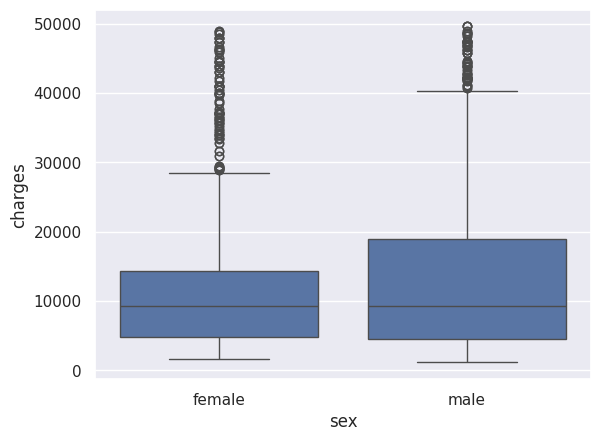

In [ ]:
sb.boxplot(data=medIn_cleaned, y=medIn_cleaned['charges'], x=medIn_cleaned['sex'])

In [ ]:
medIn_cleaned['smoker'].value_counts()

smoker
no     2208
yes     550
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

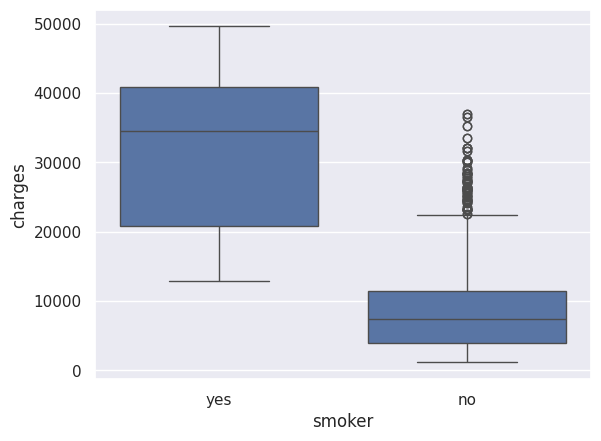

In [ ]:
sb.boxplot(data=medIn_cleaned, y=medIn_cleaned['charges'], x=medIn_cleaned['smoker'])

In general, we observe that smokers incur higher medical insurance charges, as seen from how the second quartile for a smoker almost coincides with the 3rd quartile \(75th percentile\) of non\-smokers.  



In [ ]:
medIn_cleaned['region'].value_counts()

region
southeast    762
southwest    680
northwest    660
northeast    656
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

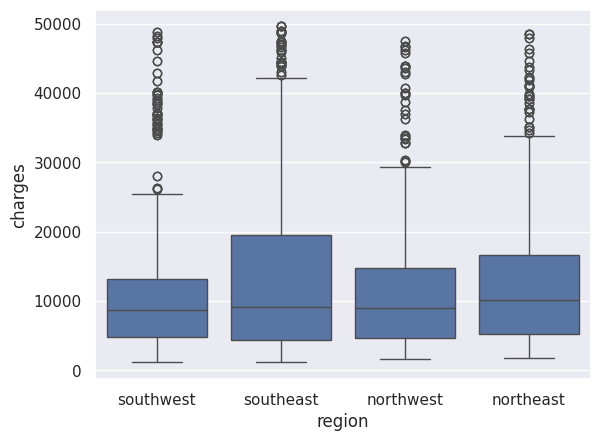

In [ ]:
sb.boxplot(data=medIn_cleaned, y=medIn_cleaned['charges'], x=medIn_cleaned['region'])

As 'region' does not show a statistically significant relationship with the 'charges', and that it cannot be converted into float values, and there are no continuous relationship between different regions, we decided to not include this feature as a predictor.

In [ ]:
medIn_cleaned['healthyweight'].value_counts()

healthyweight
3    1474
2     778
1     466
0      40
Name: count, dtype: int64

<Axes: xlabel='healthyweight', ylabel='charges'>

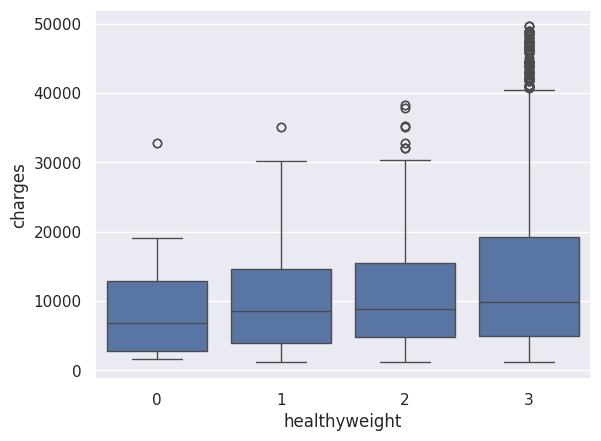

In [ ]:
sb.boxplot(data=medIn_cleaned, y=medIn_cleaned['charges'], x=medIn_cleaned['healthyweight'])

The graph above showed that the insurance charges increases as the bmi increases. The obesity community has the highest insurance charges.

---

## **Linear Regression**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### **Age as only predictor (Age is the numerical data that has the highest correlation with charges)**

In [ ]:
# With seed
seed_value = 42
np.random.seed(seed_value)

X = pd.DataFrame(medIn_cleaned[['age']])
y = pd.DataFrame(medIn_cleaned['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

<Axes: >

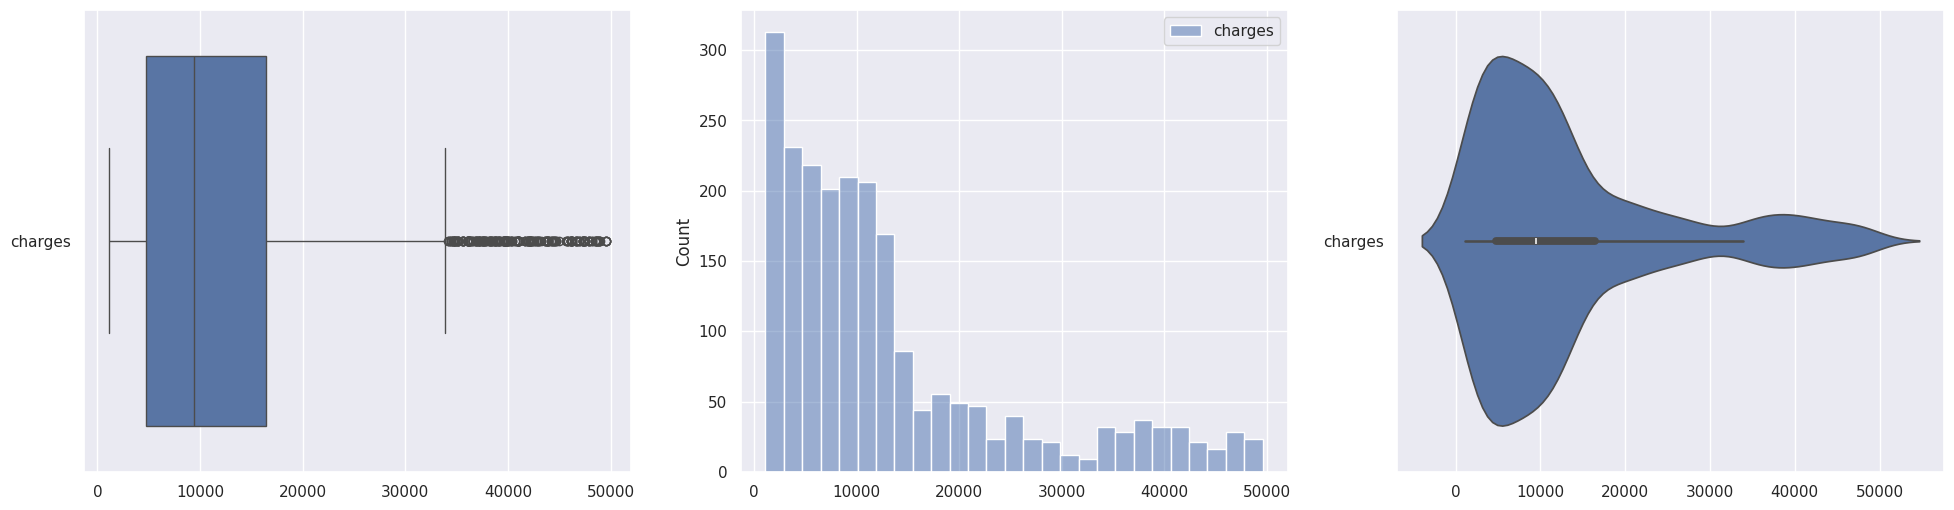

In [ ]:
# Visualize the distribution of the target variable

f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

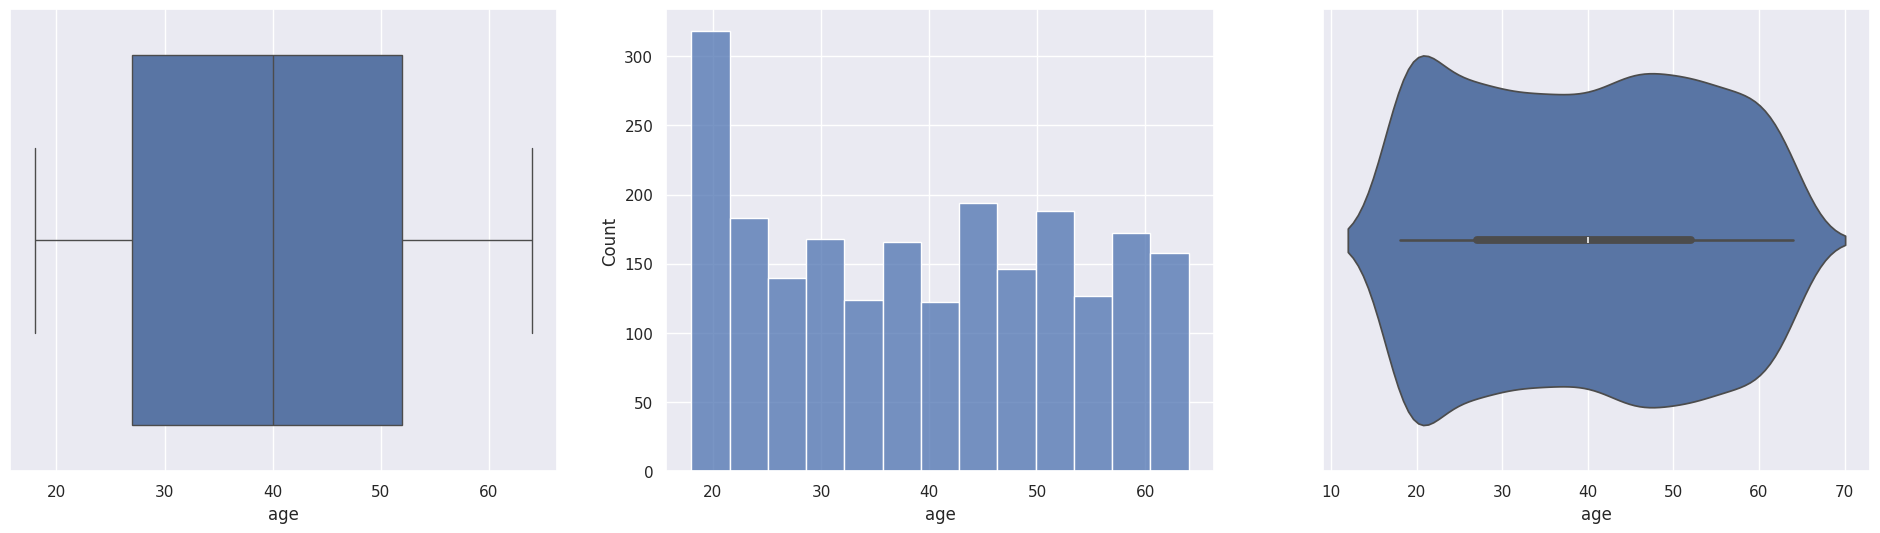

In [ ]:
# Visualize the distribution of the predictor variables

f, axes = plt.subplots(1, 3, figsize=(24, 6))

for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[0])
    sb.histplot(data = X_train[var], ax = axes[1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[2])

<Axes: >

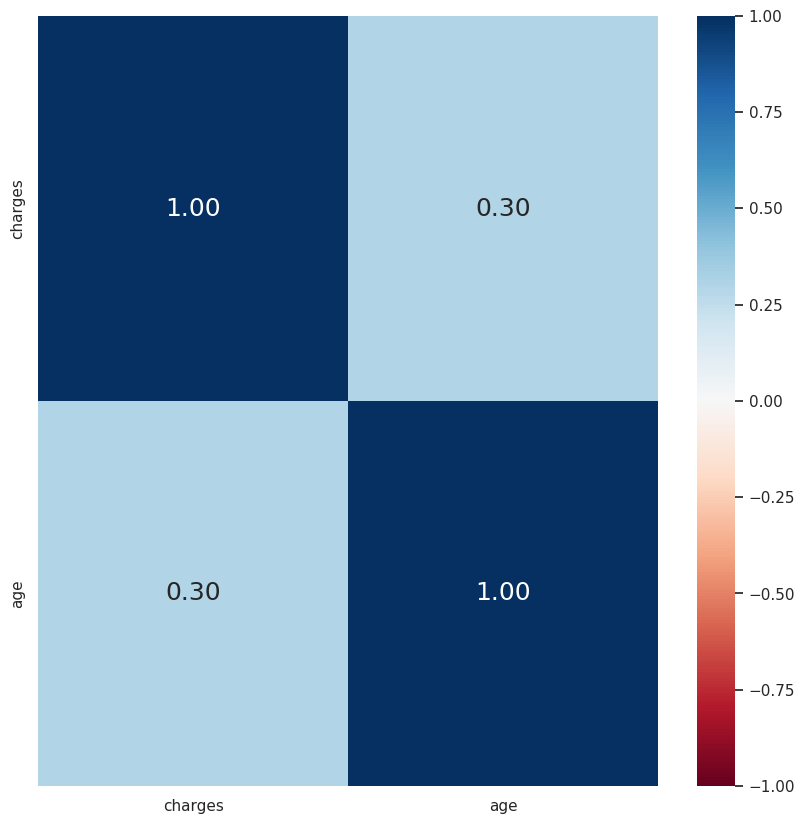

In [ ]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(10, 10))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",
           annot_kws = {"size" : 18}, cmap = "RdBu")

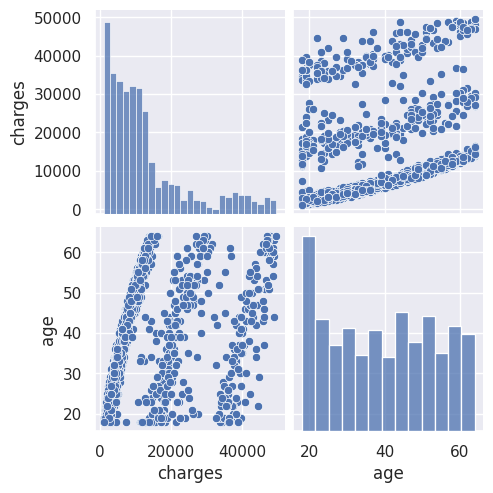

In [ ]:
sb.pairplot(data = trainDF)

In [ ]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [3287.93958556]
Coefficients of Regression 	: a =  [[252.09253201]]



Predictors  Coefficients
0        age    252.092532

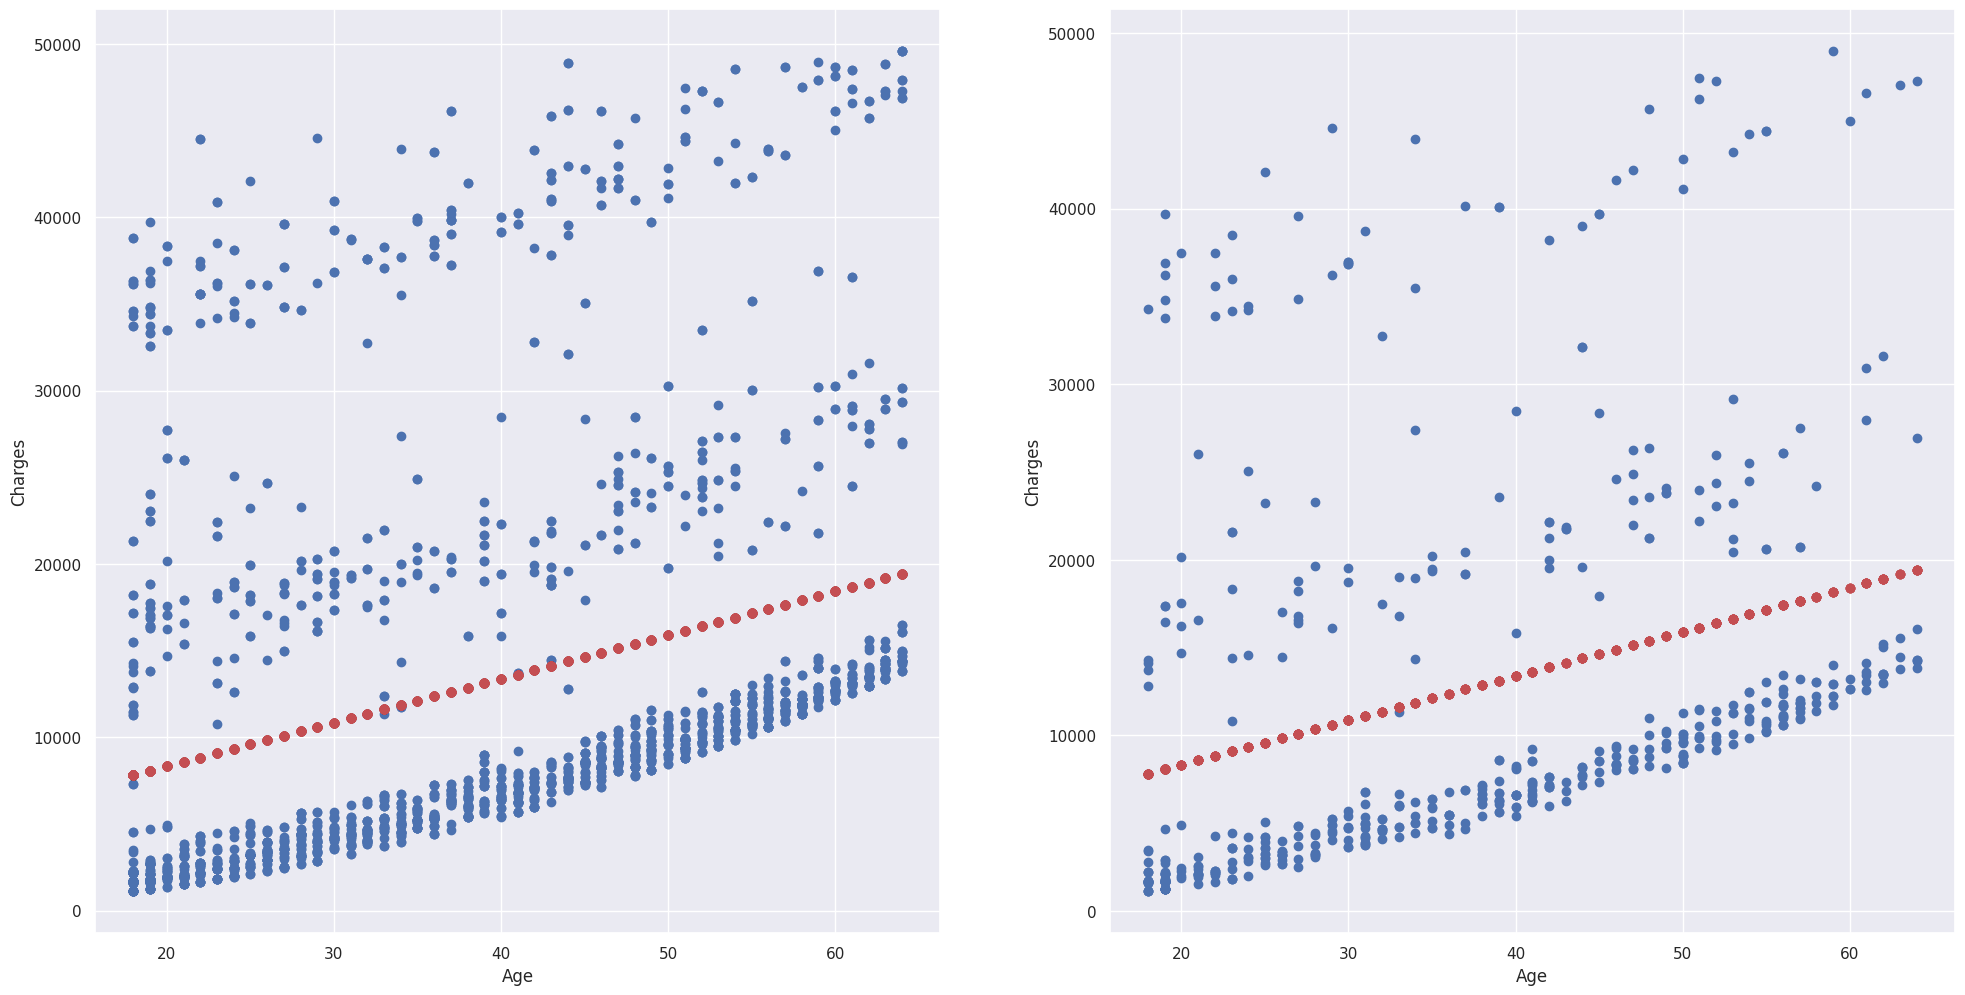

In [ ]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, y_train)
axes[0].scatter(X_train, y_train_pred, color = "r")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Charges")
axes[1].scatter(X_test, y_test)
axes[1].scatter(X_test, y_test_pred, color = "r")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Charges")
plt.show()

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08998285140765416
Mean Squared Error (MSE) 	: 128515563.41392218

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09707717107928604
Mean Squared Error (MSE) 	: 113171331.01722836



<span style='font-size:medium'>As seen from the low R^2 values and high mean square errors, the linear model prediction is not accurate. This suggests that the cost of insurance does not increase linearly when compared with age. As such, we attempted to add more columns to check if the model would predict insurance cost more accurately.</span>  



#### **Age, whether they smoke, and their weight category as predictors**

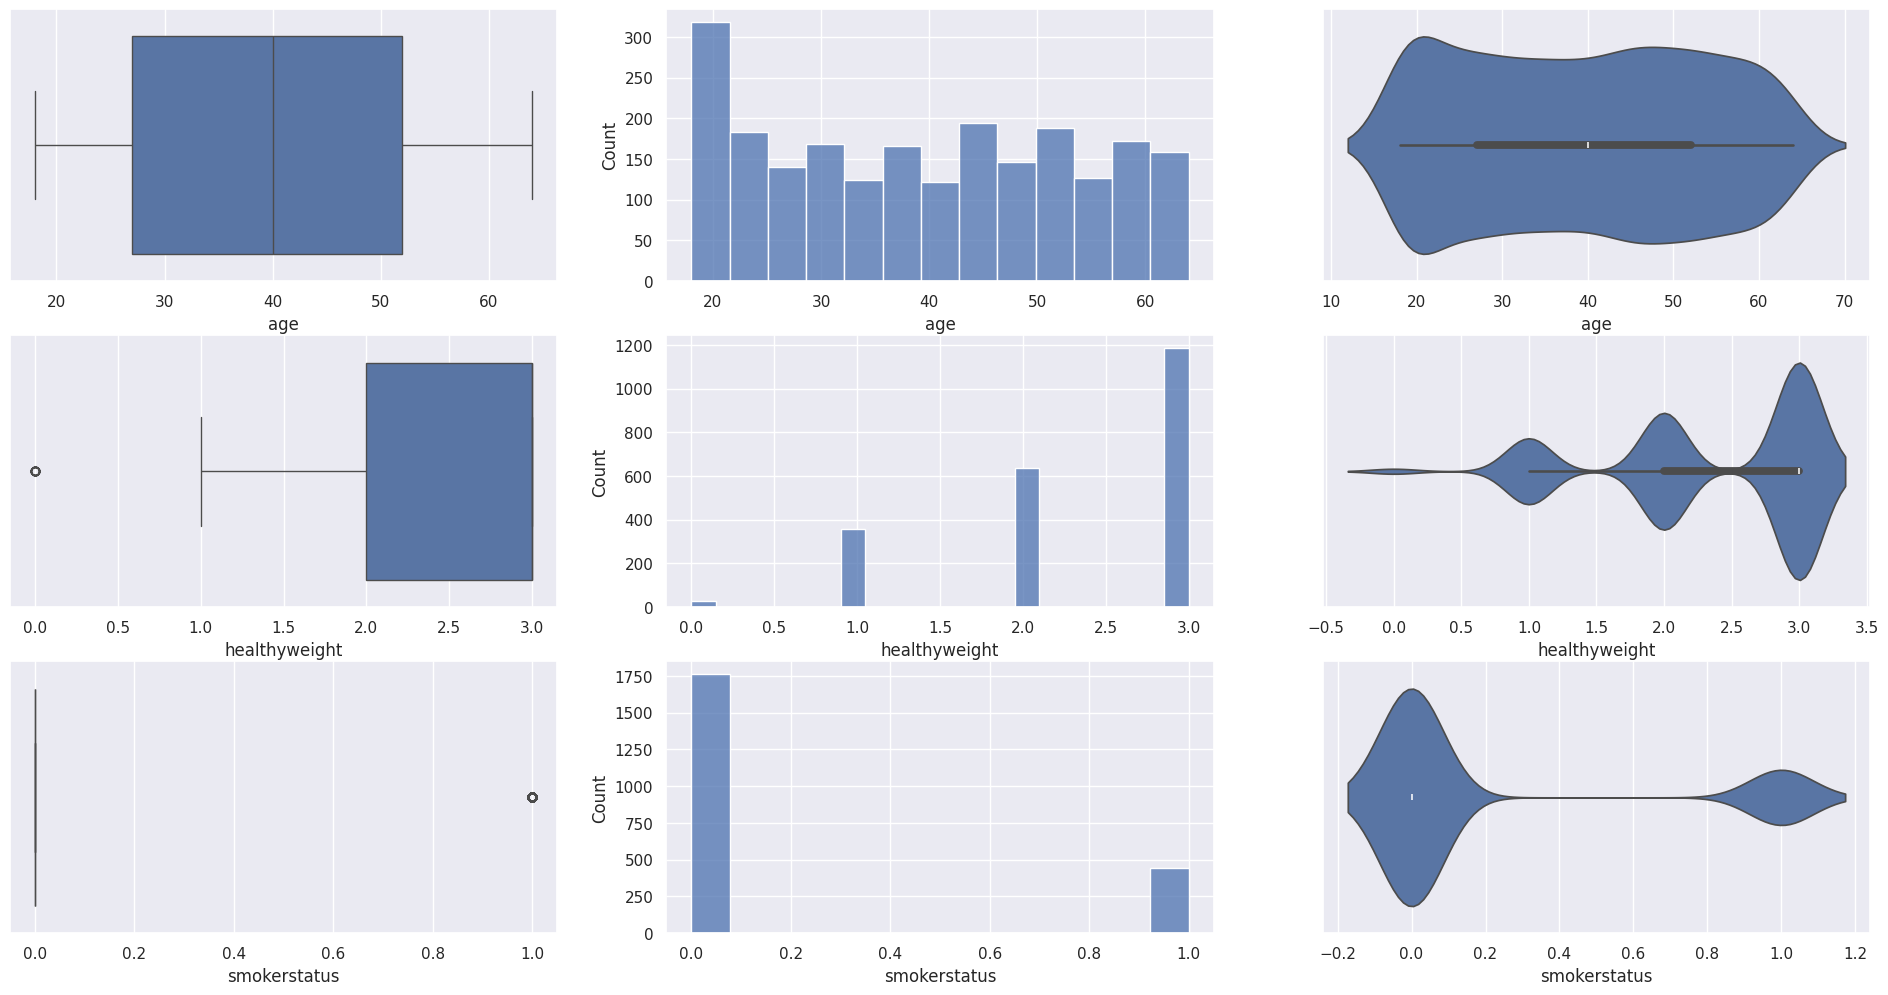

In [ ]:
# With seed
seed_value = 42
np.random.seed(seed_value)

X_2 = pd.DataFrame(medIn_cleaned[['age','healthyweight','smokerstatus']])
y_2 = pd.DataFrame(medIn_cleaned['charges'])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=seed_value)

# Visualize the distribution of the predictor variables

f, axes = plt.subplots(3, 3, figsize=(24, 12))

count = 0
for var in X_train_2:
    sb.boxplot(data = X_train_2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train_2[var], ax = axes[count,1])
    sb.violinplot(data = X_train_2[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

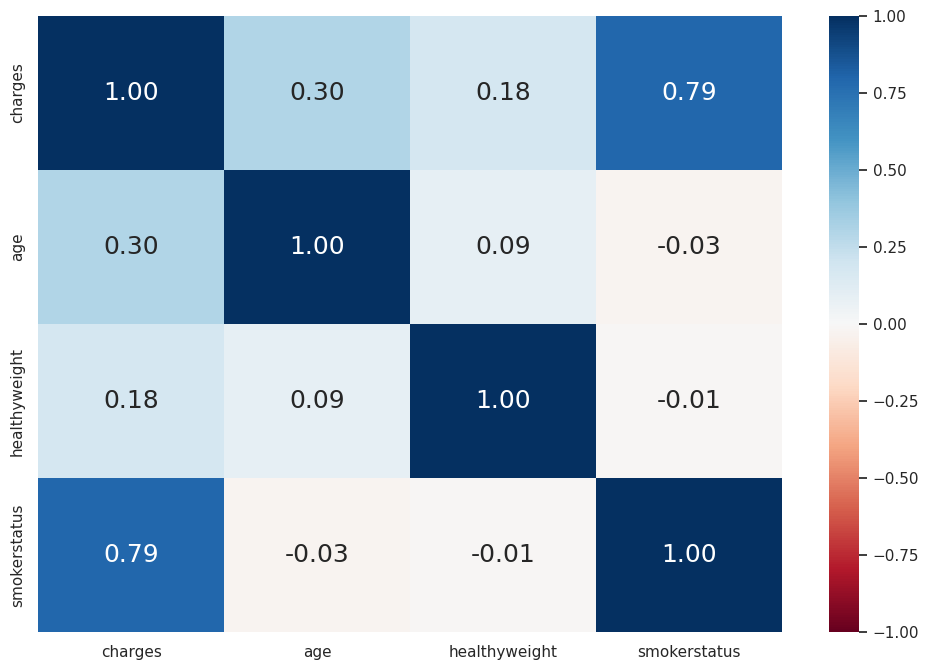

In [ ]:
# Correlation between Response and the Predictors
trainDF_2 = pd.concat([y_train_2, X_train_2], axis = 1).reindex(y_train_2.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF_2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",
           annot_kws = {"size" : 18}, cmap = "RdBu")

The high correlation of 0.79 between charges and smokerstatus indicated that the strong relationship with each other.

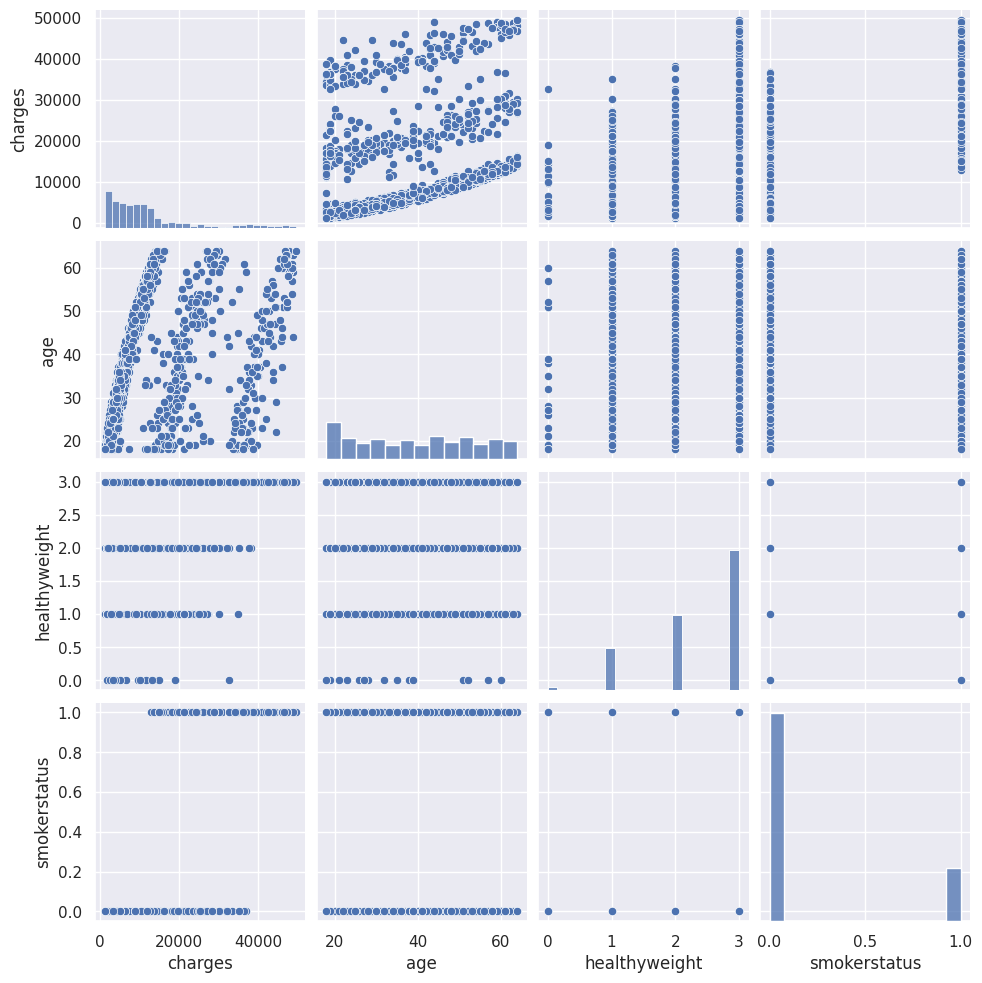

In [ ]:
sb.pairplot(data = trainDF_2)

In [ ]:
# Linear Regression using Train Data
linreg_2 = LinearRegression()         # create the linear regression object
linreg_2.fit(X_train_2, y_train_2)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_2.intercept_)
print('Coefficients of Regression \t: a = ', linreg_2.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train_2.columns, linreg_2.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-7289.35069814]
Coefficients of Regression 	: a =  [[  258.27642206  2356.378829   23728.11380897]]



Predictors  Coefficients
0            age    258.276422
1  healthyweight   2356.378829
2   smokerstatus  23728.113809

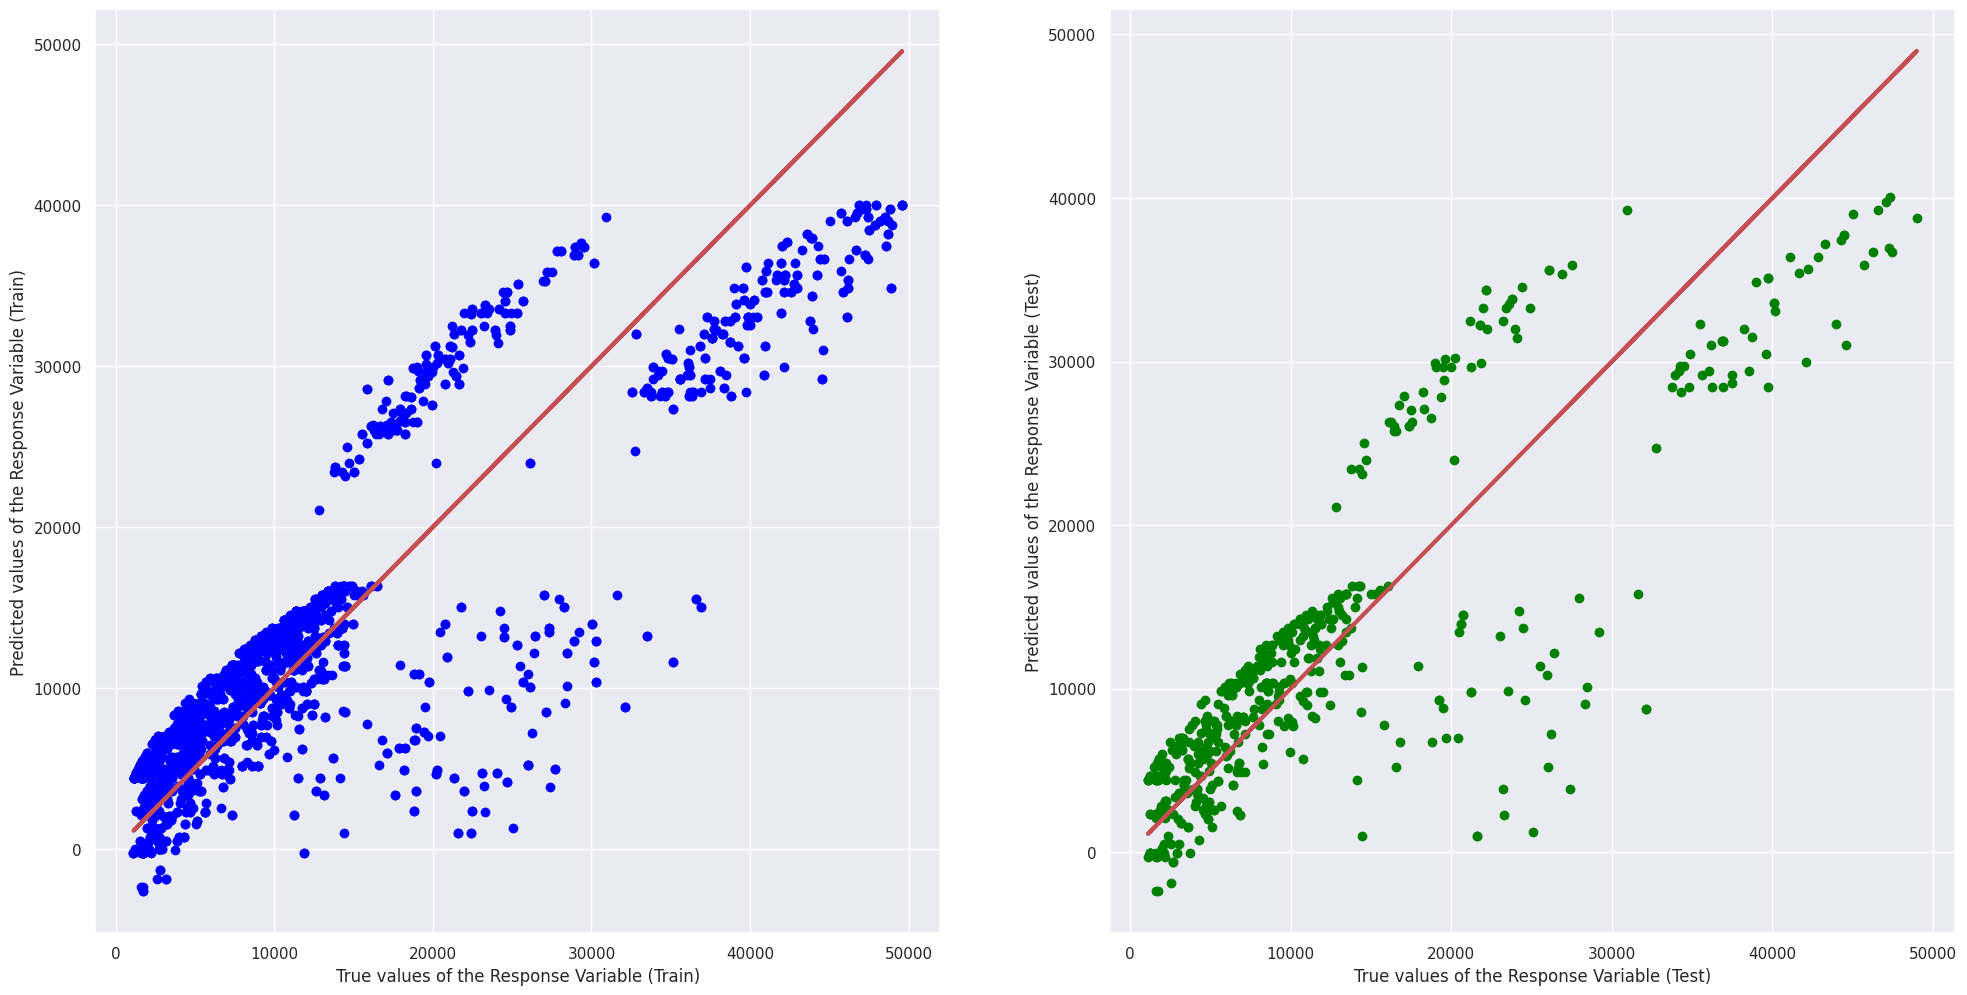

In [ ]:
# Predict the Total values from Predictors
y_train_pred_2 = linreg_2.predict(X_train_2)
y_test_pred_2 = linreg_2.predict(X_test_2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_train_pred_2, color = "blue")
axes[0].plot(y_train_2, y_train_2, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_test_pred_2, color = "green")
axes[1].plot(y_test_2, y_test_2, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()



In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_2.score(X_train_2, y_train_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_2, y_train_pred_2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_2.score(X_test_2, y_test_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_2, y_test_pred_2))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7555097828349979
Mean Squared Error (MSE) 	: 34527698.7985946

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7180076289450704
Mean Squared Error (MSE) 	: 35344606.36811837



The higher explained variance (R^2) and lower mean squared area (MSE) suggested that this model predicts more accurately compared to age as the only predictor.

### **Age, no. of children and healthyweight as predictors (separated based on whether they smoke)**



### **Predicting based on only non-smokers**


In [ ]:
medIn_cleaned_smoker = medIn_cleaned[medIn_cleaned['smoker'] == 'yes']
medIn_cleaned_nonsmoker = medIn_cleaned[medIn_cleaned['smoker'] == 'no']

In [ ]:
X_3 = pd.DataFrame(medIn_cleaned_nonsmoker[['age', 'children','healthyweight']])
y_3 = pd.DataFrame(medIn_cleaned_nonsmoker['charges'])

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=seed_value)

<Axes: >

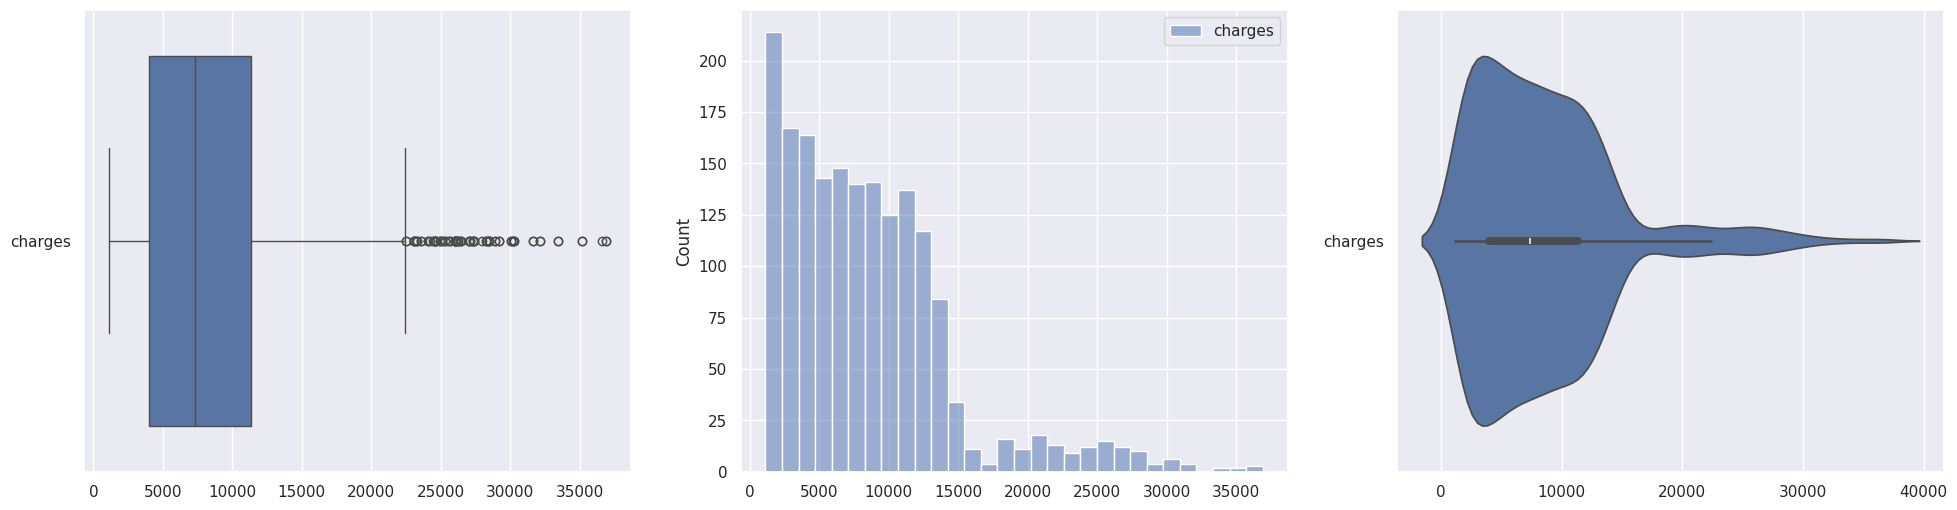

In [ ]:
# Visualize the distribution of the target variable

f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_3_train, orient = "h", ax = axes[0])
sb.histplot(data = y_3_train, ax = axes[1])
sb.violinplot(data = y_3_train, orient = "h", ax = axes[2])

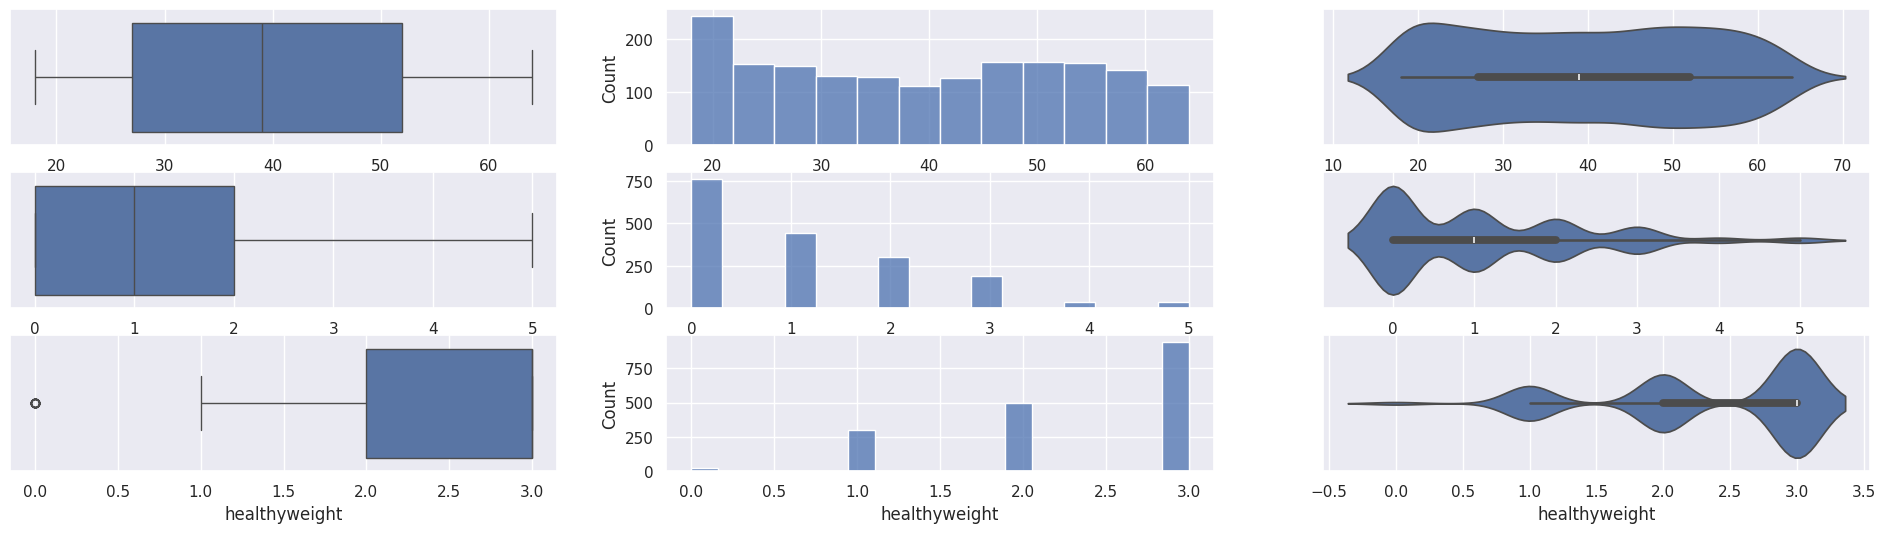

In [ ]:
# Visualize the distribution of the predictor variables

f, axes = plt.subplots(3, 3, figsize=(24, 6))

count = 0
for var in X_3_train:
    sb.boxplot(data = X_3_train[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_3_train[var], ax = axes[count, 1])
    sb.violinplot(data = X_3_train[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

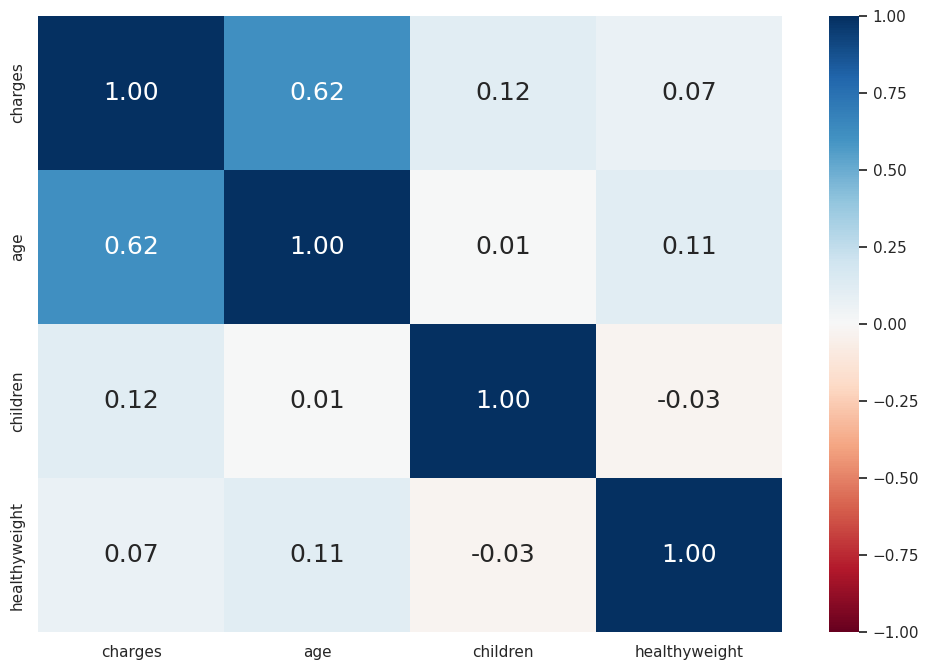

In [ ]:
# Correlation between Response and the Predictors
trainDF_3 = pd.concat([y_3_train, X_3_train], axis = 1).reindex(y_3_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF_3.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",
           annot_kws = {"size" : 18}, cmap = "RdBu")

When considering non-smokers, age turns out to be the most important predictor with a correlation of 0.62 with charges, suggesting a strong relationship. Surprisingly, the healthyweight has a very low correlation, suggesting that the health status does not show a remarkable effect on the charges


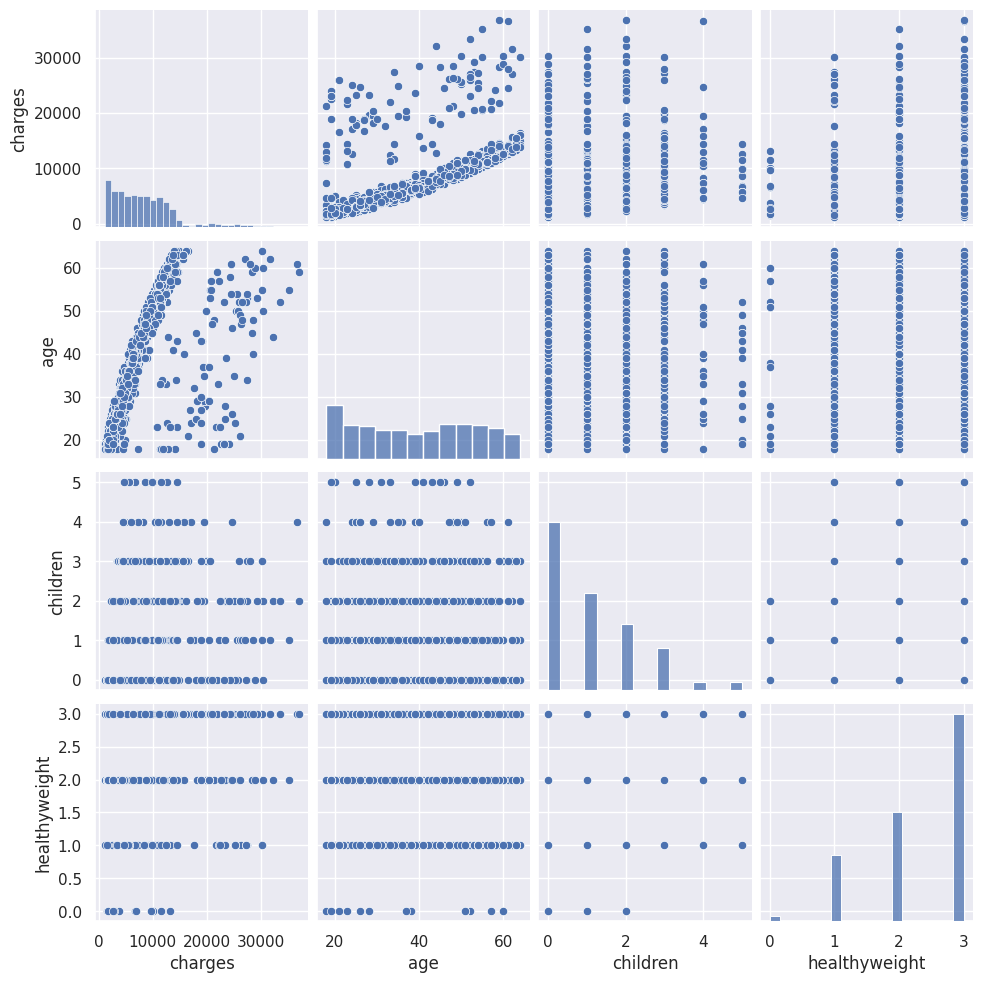

In [ ]:
sb.pairplot(data = trainDF_3)

In [ ]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_3_train, y_3_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-2705.74556069]
Coefficients of Regression 	: a =  [[266.49770236 554.63072072  42.78317031]]



Predictors  Coefficients
0        age    266.497702

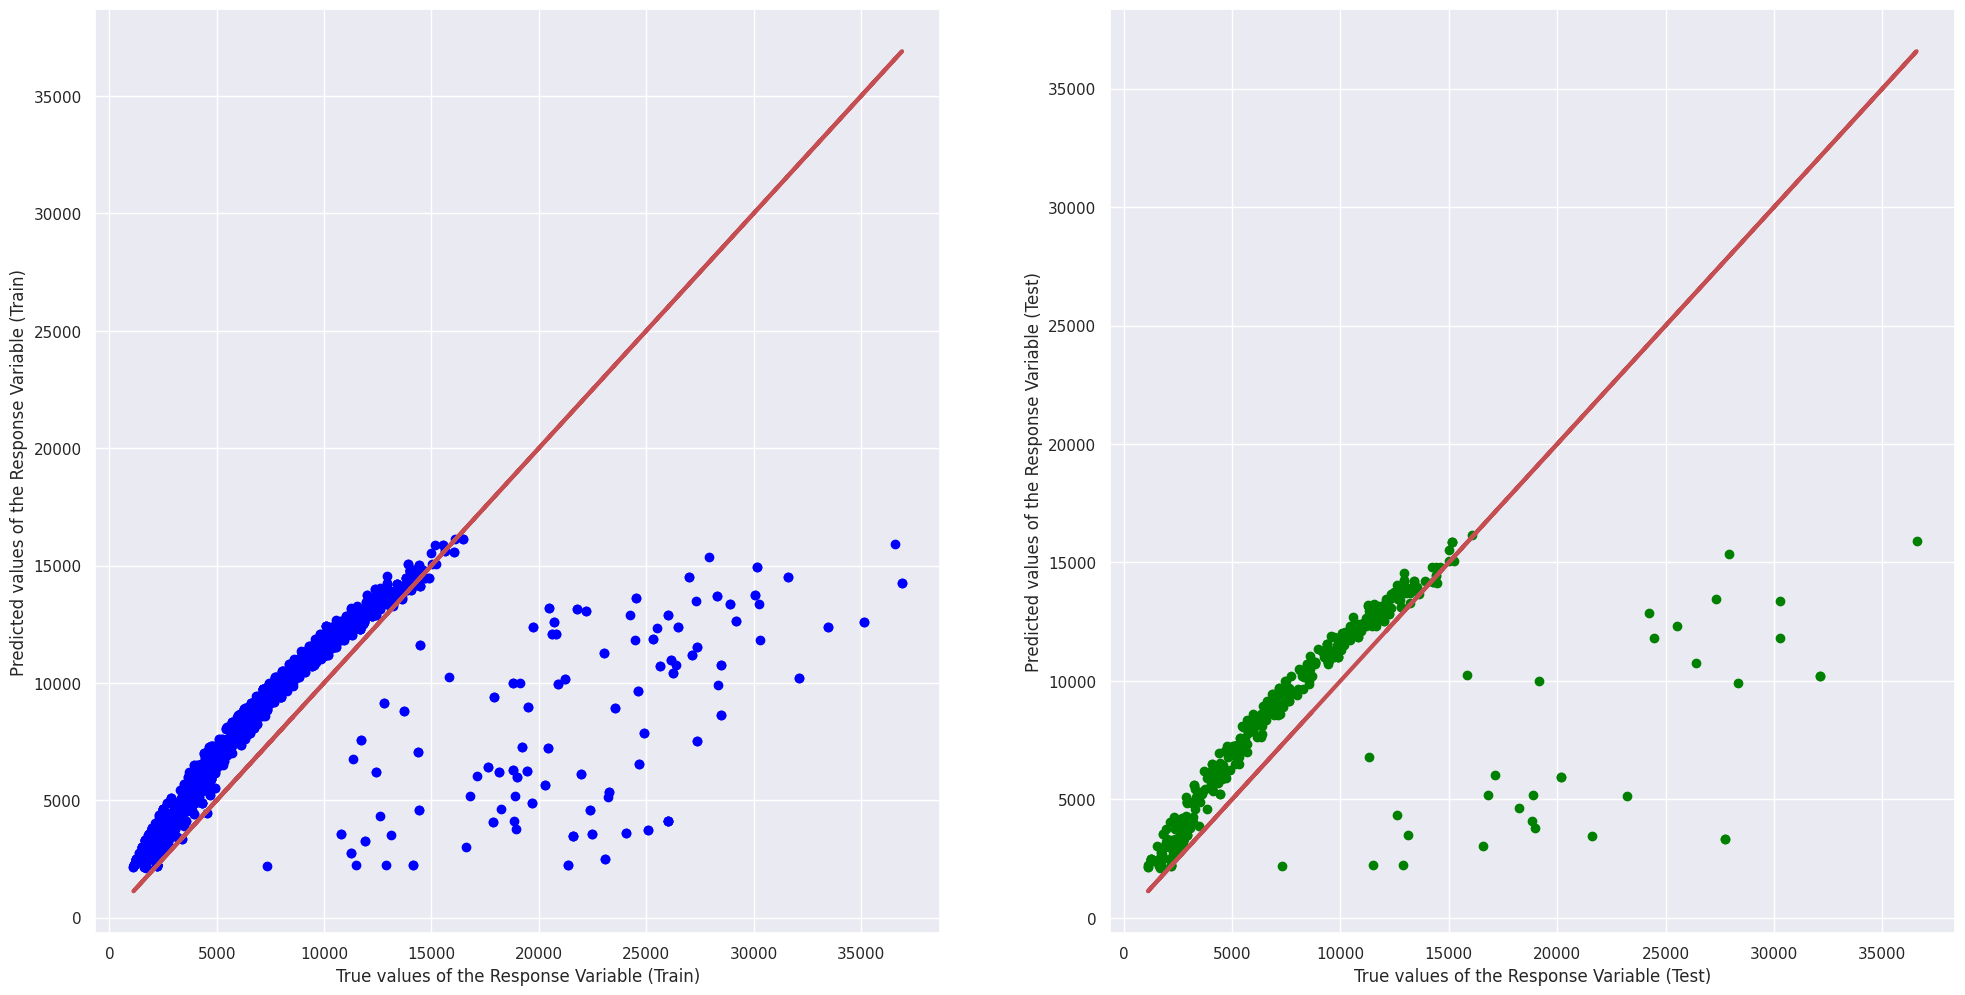

In [ ]:
# Predict the Total values from Predictors
y_3_train_pred = linreg.predict(X_3_train)
y_3_test_pred = linreg.predict(X_3_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_3_train, y_3_train_pred, color = "blue")
axes[0].plot(y_3_train, y_3_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_3_test, y_3_test_pred, color = "green")
axes[1].plot(y_3_test, y_3_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()



In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_3_train, y_3_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_3_train, y_3_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_3_test, y_3_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_3_test, y_3_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3936203327844131
Mean Squared Error (MSE) 	: 22371205.485831723

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.42232857746839714
Mean Squared Error (MSE) 	: 19125086.11410112



The explained variance (R^2) and lower mean squared area (MSE)

### **Predicting based on only smokers**


In [ ]:
X_4 = pd.DataFrame(medIn_cleaned_smoker[['age', 'children','healthyweight']])
y_4 = pd.DataFrame(medIn_cleaned_smoker['charges'])

X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=seed_value)

<Axes: >

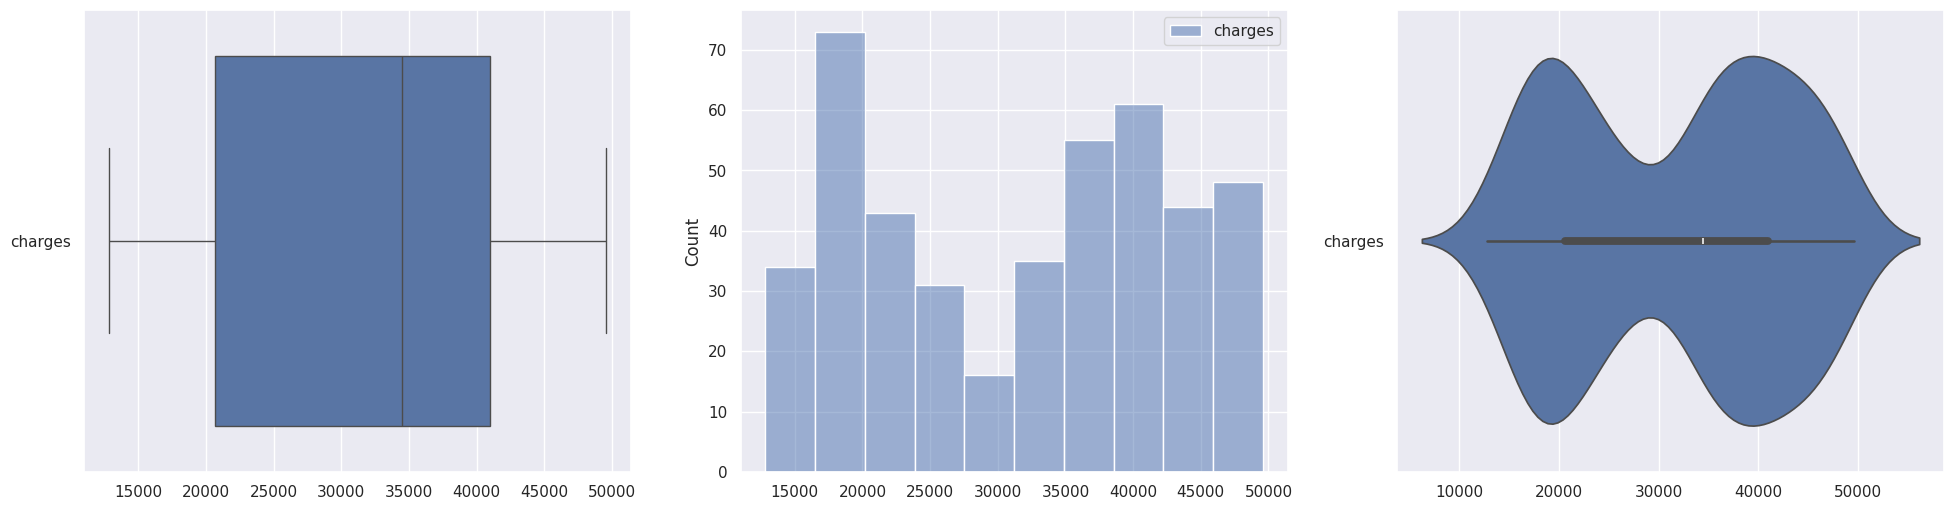

In [ ]:
# Visualize the distribution of the target variable

f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_4_train, orient = "h", ax = axes[0])
sb.histplot(data = y_4_train, ax = axes[1])
sb.violinplot(data = y_4_train, orient = "h", ax = axes[2])

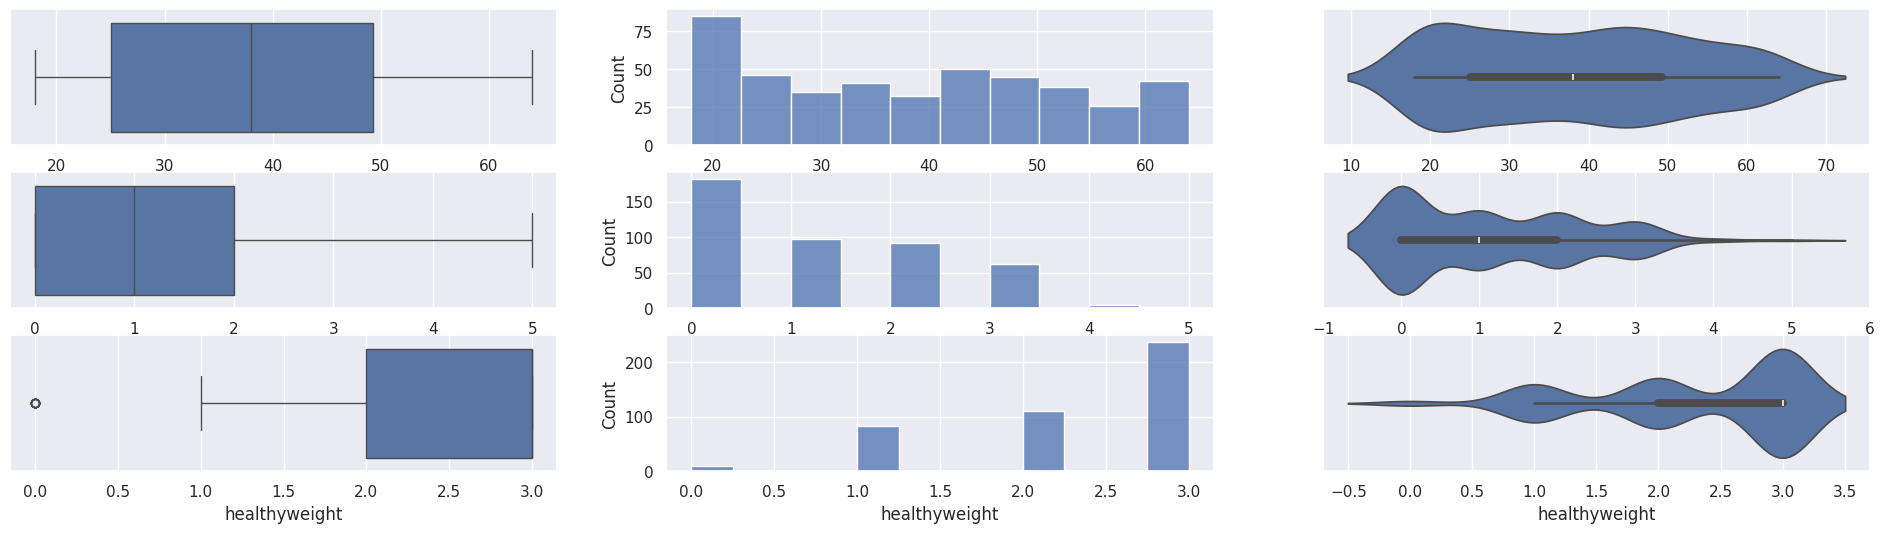

In [ ]:
# Visualize the distribution of the predictor variables

f, axes = plt.subplots(3, 3, figsize=(24, 6))

count = 0
for var in X_4_train:
    sb.boxplot(data = X_4_train[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_4_train[var], ax = axes[count, 1])
    sb.violinplot(data = X_4_train[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

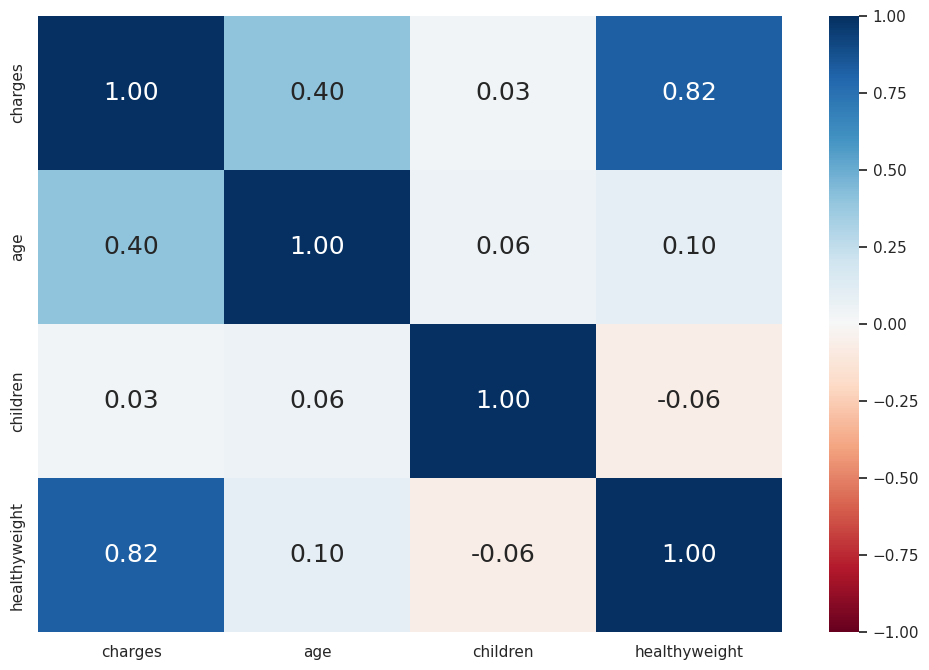

In [ ]:
# Correlation between Response and the Predictors
trainDF_4 = pd.concat([y_4_train, X_4_train], axis = 1).reindex(y_4_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF_4.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",
           annot_kws = {"size" : 18}, cmap = "RdBu")

When considering smokers, healthyweight turns out to be the most important predictor with a correlation of 0.82 with charges, suggesting a strong relationship. One of the possible reasons is smoking and high BMI both have well-established associations with various health issues, which could contribute to higher medical costs and insurance claims.

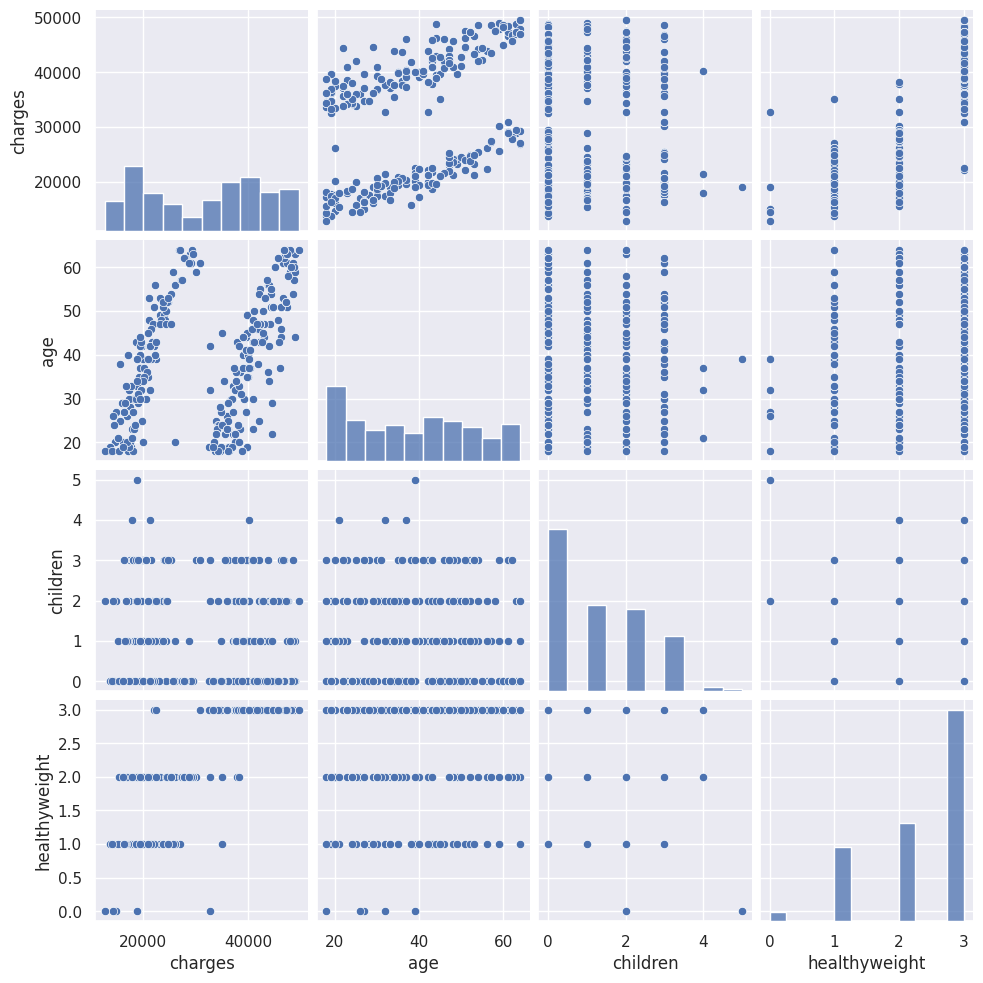

In [ ]:
sb.pairplot(data = trainDF_4)

In [ ]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_4_train, y_4_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_4_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-2341.52588525]
Coefficients of Regression 	: a =  [[  249.99019299   624.2084822  10315.87484802]]



Predictors  Coefficients
0            age    249.990193
1       children    624.208482
2  healthyweight  10315.874848

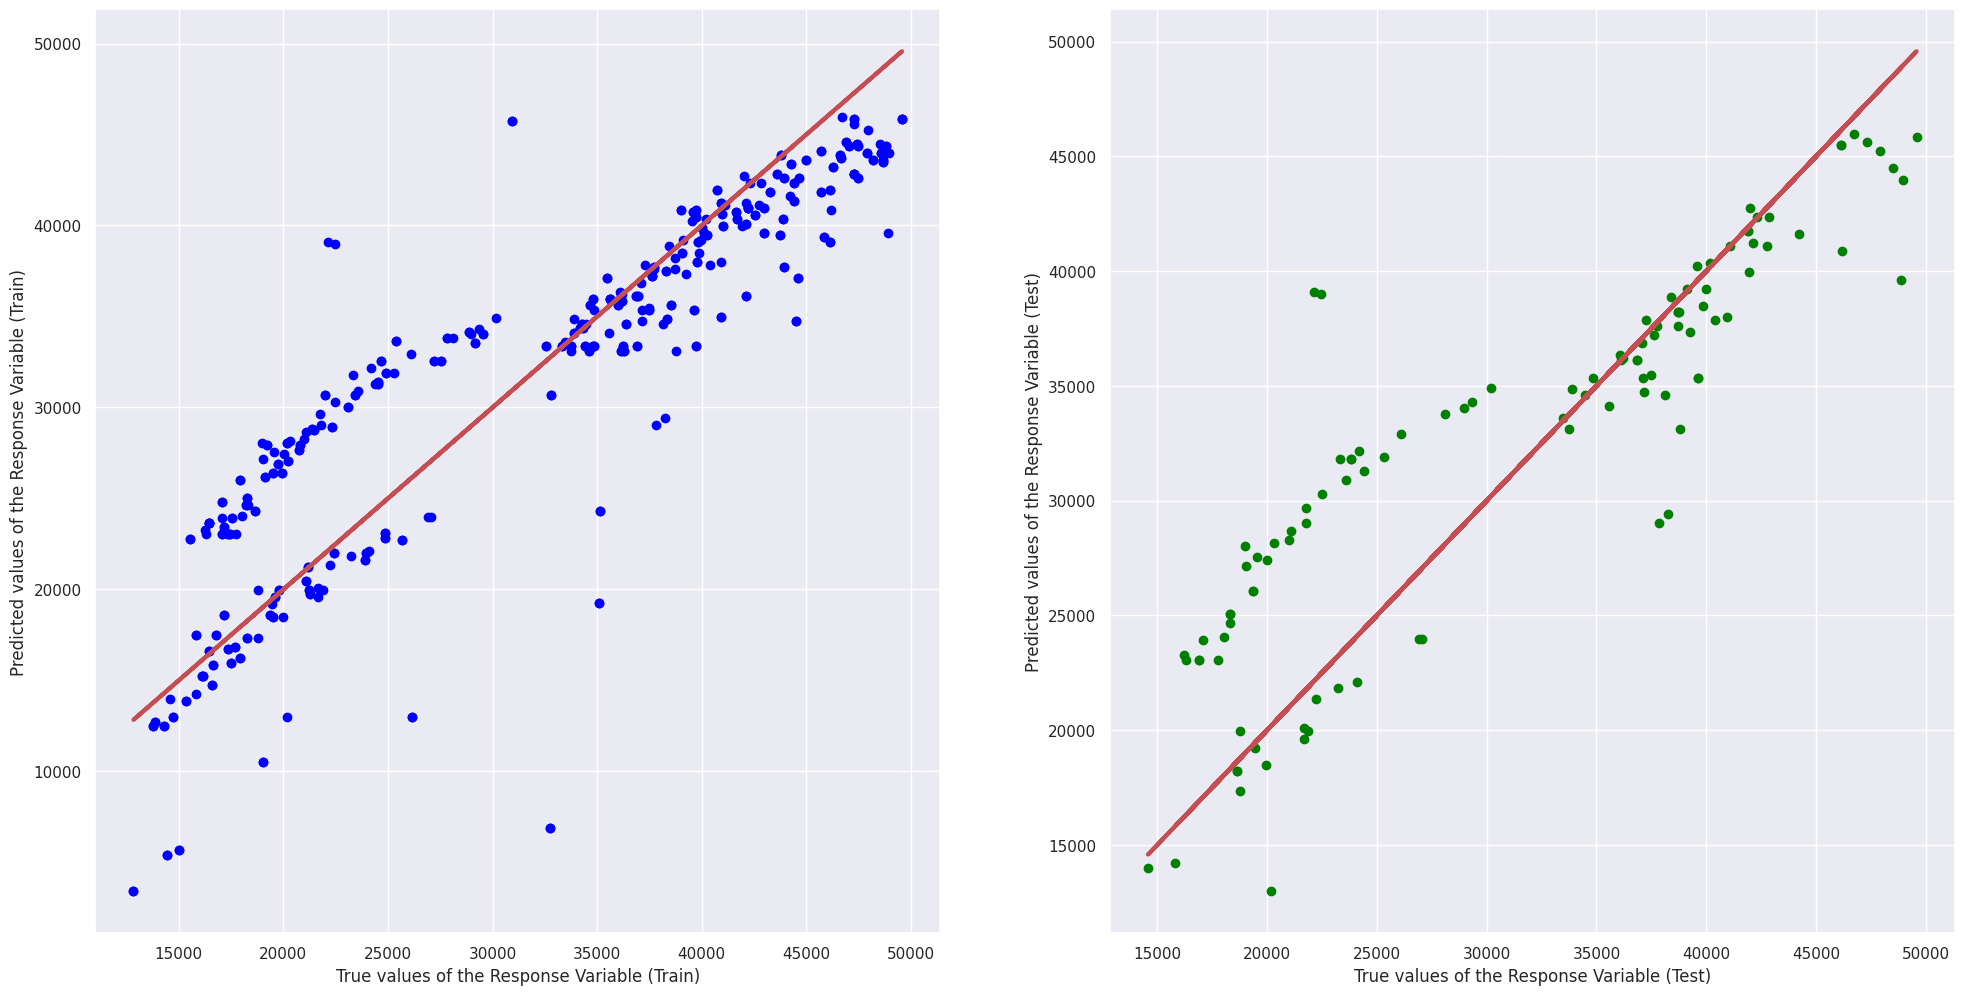

In [ ]:
# Predict the Total values from Predictors
y_4_train_pred = linreg.predict(X_4_train)
y_4_test_pred = linreg.predict(X_4_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_4_train, y_4_train_pred, color = "blue")
axes[0].plot(y_4_train, y_4_train, 'r-',linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_4_test, y_4_test_pred, color = "green")
axes[1].plot(y_4_test, y_4_test, 'r-',linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_4_train, y_4_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_4_train, y_4_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_4_test, y_4_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_4_test, y_4_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.786174177882908
Mean Squared Error (MSE) 	: 26017994.45441487

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7570888652955341
Mean Squared Error (MSE) 	: 25536476.72558323



The higher explained variance (R^2) and lower mean squared area (MSE) suggested that the prediction for smokers is more accurate than the non-smokers, suggesting that the relationship is more linear for smokers.

---

## **Polynomial Regression**
Considering that there was a moderately high correlation for linear regression based on age, whether the buyer smokes, and their weight category, we then chose to attempt polynomial regression to see if we could get a better fit.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### **Age, whether they smoke, and their weight category as predictors**

Intercept for the Polynomial model =  [8.5792342e+14]
Coefficents for the Polynomial model =  [[ 0.00000000e+00  3.70857884e+03  2.35810072e+03  1.27238964e+15
   4.53388945e+02 -3.73254091e+00  2.04876715e+01  7.15101219e+02
   3.39343377e+03 -8.57923420e+14]]



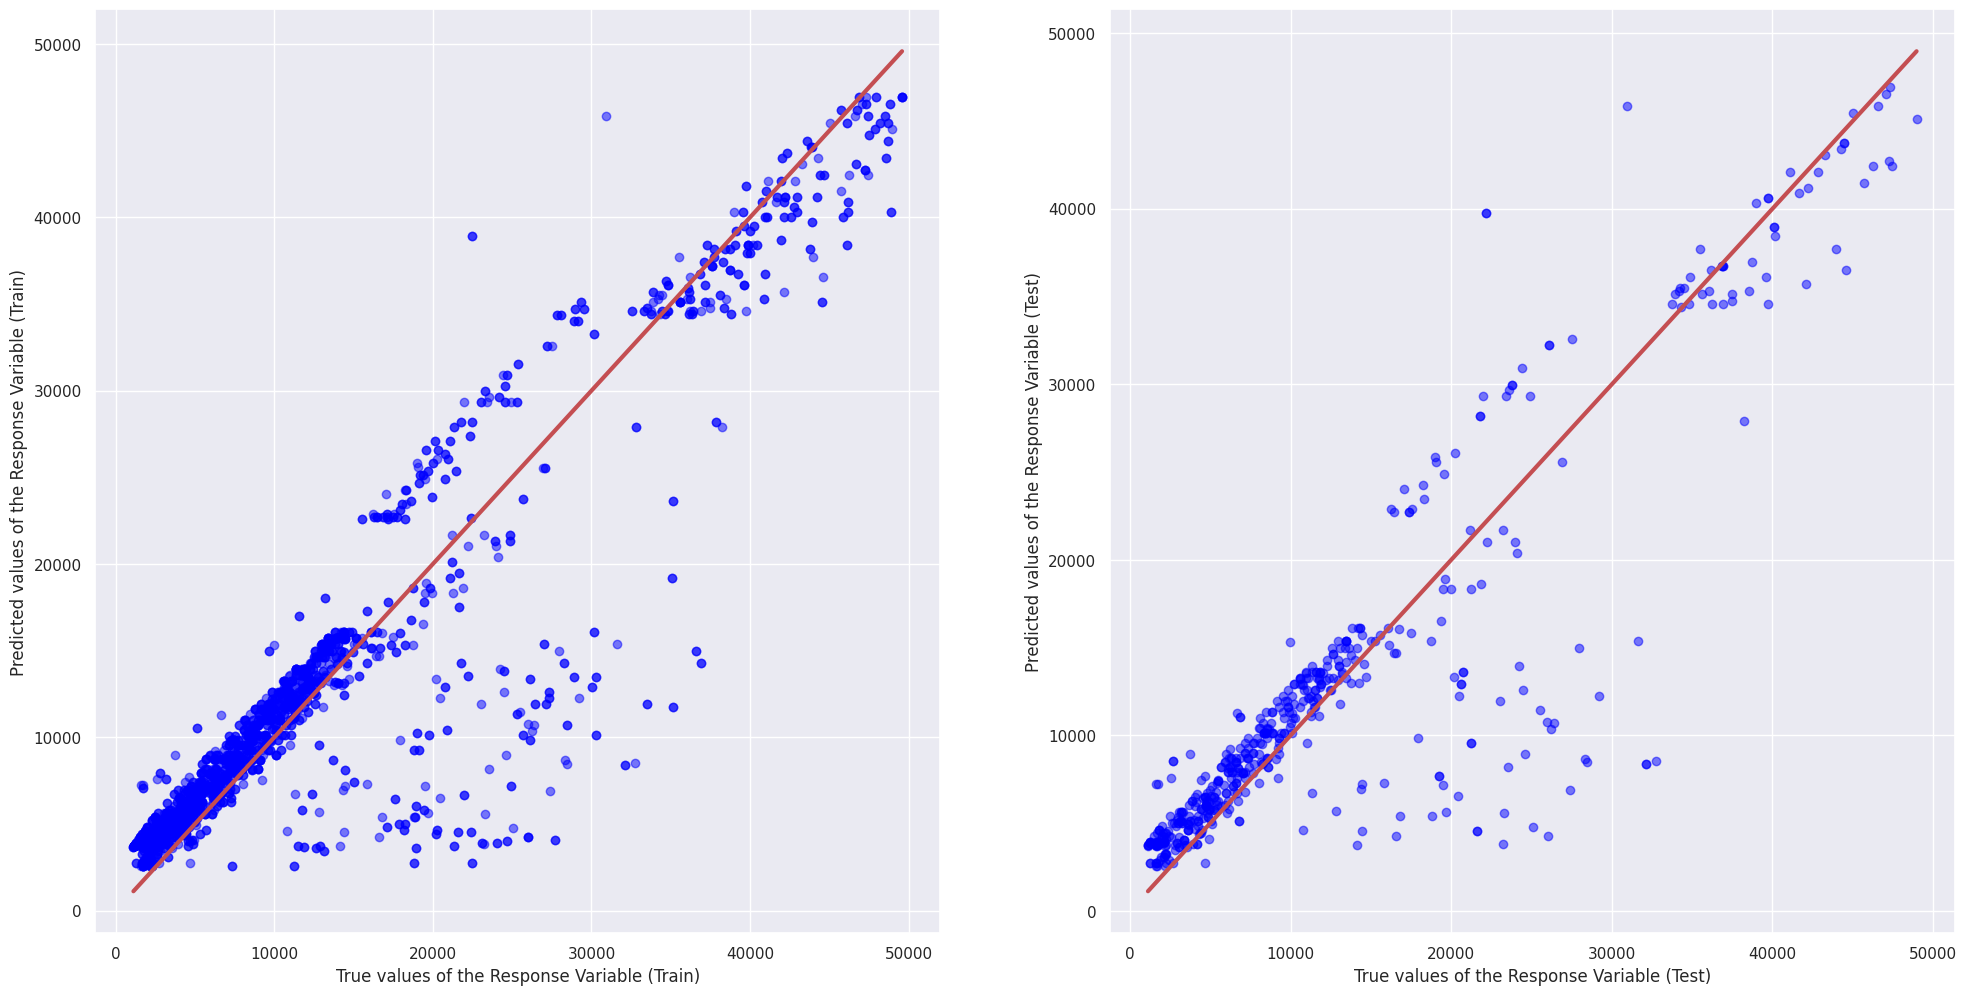

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_2)
X_test_scaled2 = scaler.transform(X_test_2)

# Feature Engineering: Adding polynomial features
poly = PolynomialFeatures(degree=2) #degree 2
X_train_poly2 = poly.fit_transform(X_train_scaled2)
X_test_poly2 = poly.transform(X_test_scaled2)

# Linear Regression with polynomial features
linreg_poly2 = LinearRegression()
linreg_poly2.fit(X_train_poly2, y_train_2)

# Predictions on test data
y_test_poly_pred2 = linreg_poly2.predict(X_test_poly2)
y_train_poly_pred2 = linreg_poly2.predict(X_train_poly2)

print ("Intercept for the Polynomial model = ", linreg_poly2.intercept_)
print ("Coefficents for the Polynomial model = ", linreg_poly2.coef_)
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_train_poly_pred2, color='blue', alpha=0.5)
axes[0].plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], 'r', lw=3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_test_poly_pred2, color='blue', alpha=0.5)
axes[1].plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r', lw=3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_poly2.score(X_train_poly2, y_train_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_2, y_train_poly_pred2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_poly2.score(X_test_poly2, y_test_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_2, y_test_poly_pred2))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8444290033379419
Mean Squared Error (MSE) 	: 21970239.04199641

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8030532061888607
Mean Squared Error (MSE) 	: 24685089.446486294



The R^2 values increased from ```0.7555097828349979``` to ```0.8444290033379419``` for the train dataset, and from ```0.7180076289450704``` to ```0.8030532061888607``` for the test dataset.

MSE also decreased from ```34558289.40237291``` to ```21976508.993736245``` for the train dataset, and from ```35385856.9731341``` to ```24702397.654163543``` for the test dataset.

Thus, we observe that the polynomial regression provides a better fit for the data points as compared to linear regression.

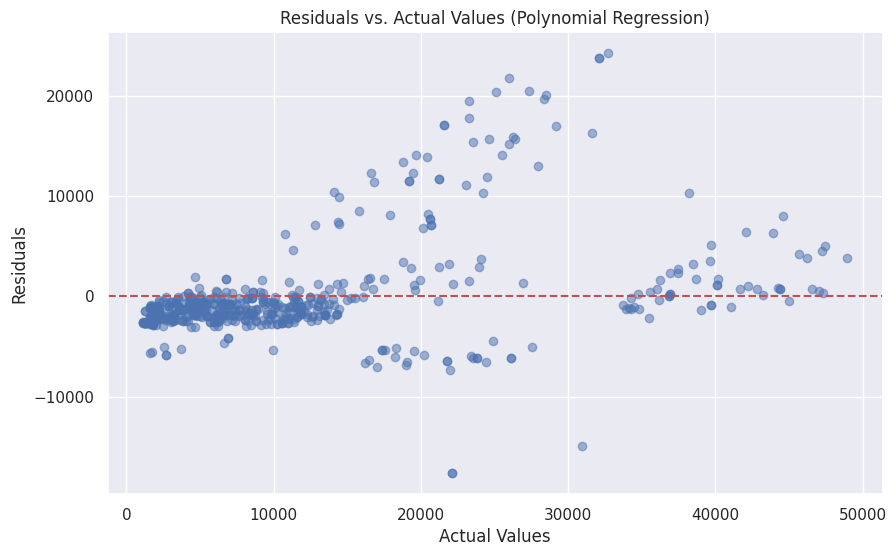

In [ ]:
# Model Evaluation
mse_train_poly = mean_squared_error(y_train_2, y_train_poly_pred2)
mse_test_poly = mean_squared_error(y_test_2, y_test_poly_pred2)
r2_train_poly = linreg_poly2.score(X_train_poly2, y_train_2)
r2_test_poly = linreg_poly2.score(X_test_poly2, y_test_2)

# Residual Analysis
residuals_poly2 = y_test_2 - y_test_poly_pred2

# Visualizing residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, residuals_poly2, alpha=0.5)
plt.title('Residuals vs. Actual Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<span style='font-size:medium'>The residuals in the lower range are clustered near the residual line \(i.e. residual = 0\), while residuals in the higher range deviate further from the residual line. This implies that the model predicts lower insurance costs more accurately, and becomes less accurate as it tries to predict higher insurance costs.</span>  



### **Fine-tuning the polynomial regression model**

Best degree 11 with RMSE 4604.735126529976
[5945.132998354064, 4968.4091464458015, 4688.281246962559, 4676.0245744373415, 4668.202527140336, 4646.8072334212775, 4633.094724129933, 4634.335476134897, 4616.059792829599, 4609.193207414838, 4604.735126529976, 4607.158515502027, 4633.368341385063, 106535.05619495224]


Text(0, 0.5, 'RMSE')

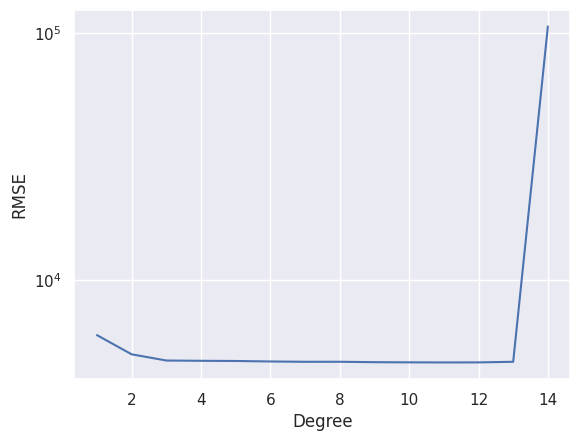

In [ ]:
rmses = []
degrees = np.arange(1, 15)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled2 = scaler.fit_transform(X_train_2)
    X_test_scaled2 = scaler.transform(X_test_2)

    # Train features
    poly_features = PolynomialFeatures(degree=deg)
    X_poly_train2 = poly_features.fit_transform(X_train_scaled2)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train2, y_train_2)

    # Compare with test data
    X_poly_test2 = poly_features.fit_transform(X_test_scaled2)
    poly_predict = poly_reg.predict(X_poly_test2)
    poly_mse = mean_squared_error(y_test_2, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
print(rmses)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

The root mean-squared error for the model gradually decreases from degree 1 to degree 11. However, a drastic increase in the RMSE from degree 12 onwards indicates that the model is overfitted.

Intercept for the Polynomial model =  [-5.59190052e+09]
Coefficents for the Polynomial model =  [[-4.84462501e-07  2.16009182e+09  4.55810422e+09 -1.36549676e+10
   2.77622843e+09  8.00638169e+08  1.76200033e+08  4.53951111e+09
  -3.90626419e+09 -3.79672951e+08  4.38091001e+08  1.27645514e+09
   1.76769746e+09 -2.13213562e+09 -1.60000012e+09 -2.07192874e+09
   2.40237376e+09 -2.94664094e+09  2.00104384e+09 -9.48220317e+07
  -2.06263242e+07  3.31485312e+08  1.67785641e+08 -1.72862486e+09
  -1.07739006e+09 -1.98605567e+09  5.44453952e+08  3.99013276e+08
   1.66537592e+08  1.26678161e+09  9.58880103e+09 -1.16458214e+07
   9.38997996e+08 -9.74505322e+08 -2.05045267e+09  2.63899009e+07
   5.24838221e+07 -4.95695371e+07 -2.52379821e+08 -1.38858341e+08
  -1.50895861e+08 -1.75142277e+08  6.71469736e+08  4.97241424e+08
   8.70514617e+08 -8.61990280e+08 -1.41649437e+08 -4.13131897e+08
  -2.38318726e+08 -3.79737293e+08 -8.33597039e+09 -4.90290788e+09
   2.39308368e+08 -1.33940155e+09  4.50887644e

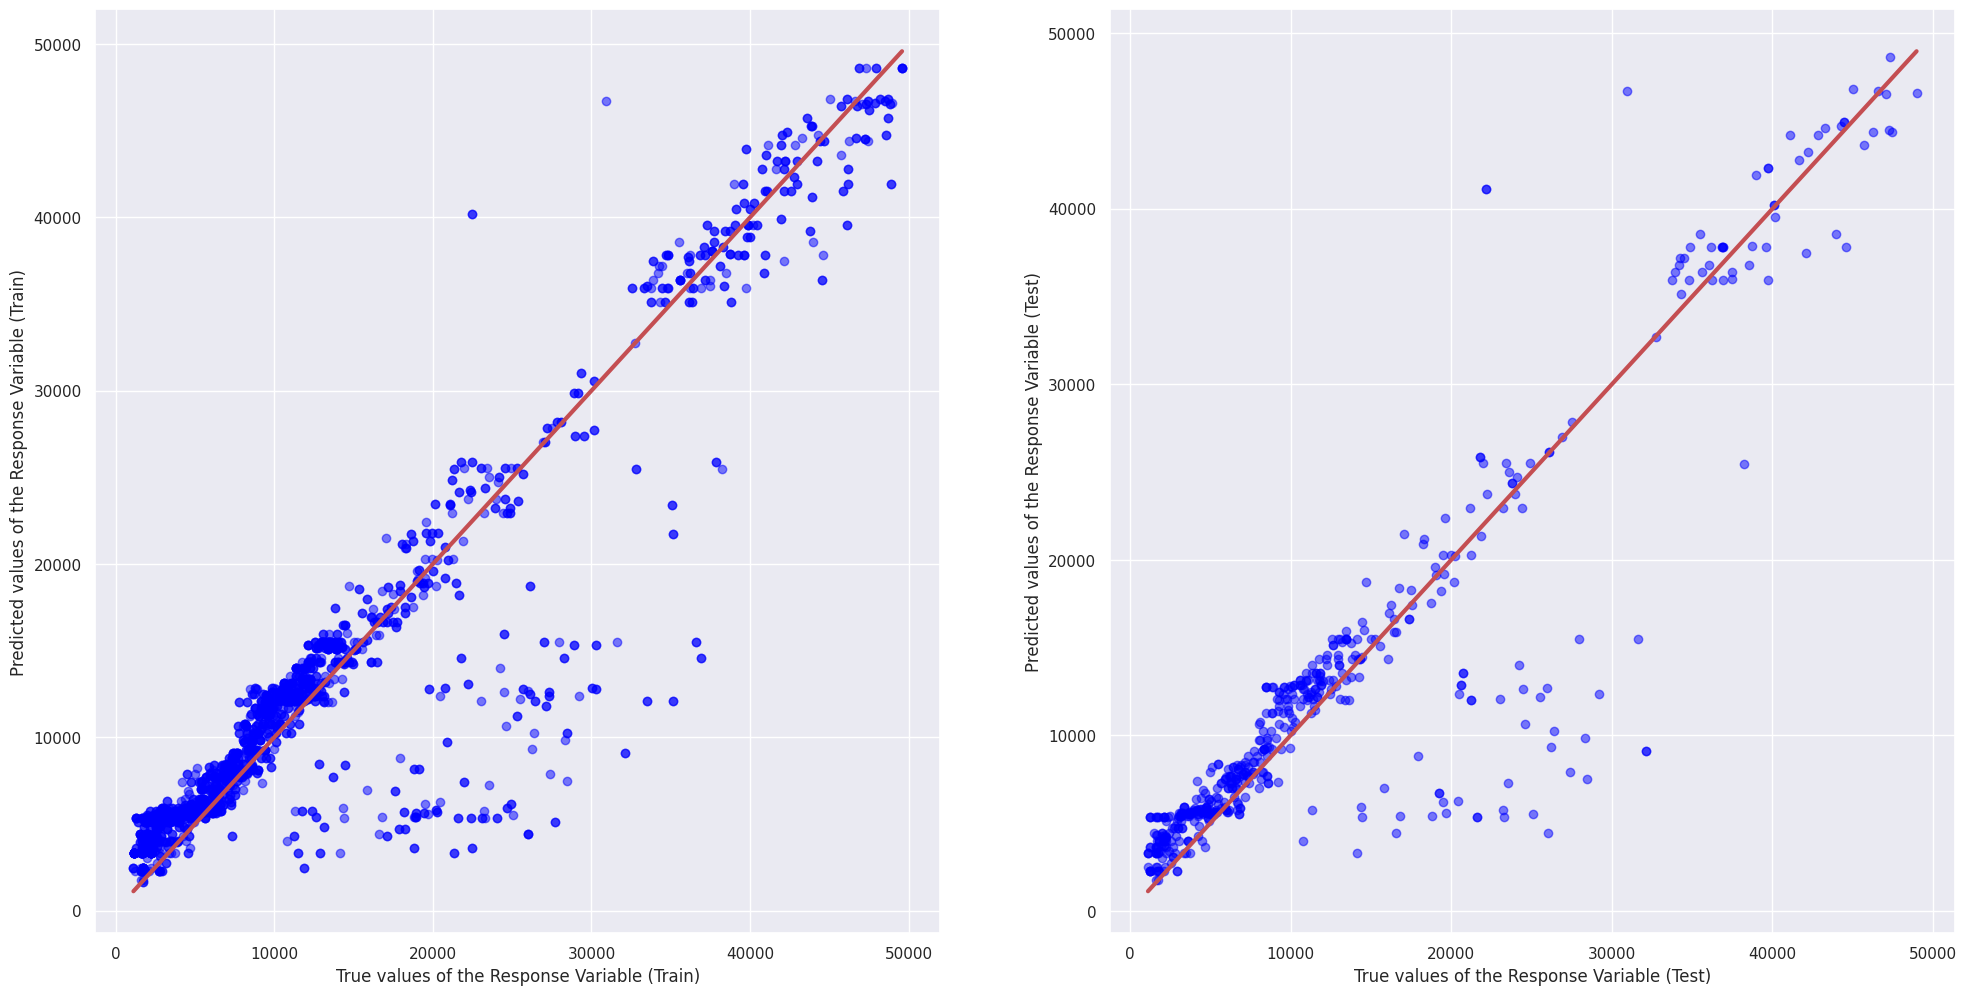

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_2)
X_test_scaled2 = scaler.transform(X_test_2)

# Feature Engineering: Adding polynomial features
poly = PolynomialFeatures(degree=11) #degree 2
X_train_poly2 = poly.fit_transform(X_train_scaled2)
X_test_poly2 = poly.transform(X_test_scaled2)

# Linear Regression with polynomial features
linreg_poly2 = LinearRegression()
linreg_poly2.fit(X_train_poly2, y_train_2)

# Predictions on test data
y_test_poly_pred2 = linreg_poly2.predict(X_test_poly2)
y_train_poly_pred2 = linreg_poly2.predict(X_train_poly2)

print ("Intercept for the Polynomial model = ", linreg_poly2.intercept_)
print ("Coefficents for the Polynomial model = ", linreg_poly2.coef_)
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_train_poly_pred2, color='blue', alpha=0.5)
axes[0].plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], 'r', lw=3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_test_poly_pred2, color='blue', alpha=0.5)
axes[1].plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r', lw=3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_poly2.score(X_train_poly2, y_train_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_2, y_train_poly_pred2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_poly2.score(X_test_poly2, y_test_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_2, y_test_poly_pred2))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8685612410998583
Mean Squared Error (MSE) 	: 18562206.416228037

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8308299345069403
Mean Squared Error (MSE) 	: 21203585.58549903



When conducting polynomial regression at ```degree=11``` instead of ```degree=2```, we observe and increase in R^2 from ```0.8443846058855826``` to ```0.8685907570140241``` for the train dataset and from ```0.8029151148922486``` to ```0.8307624264117659``` for the test dataset.

The MSE also decreases from ```21976508.993736245``` to ```18558038.083417438``` for the train dataset, and from ```24702397.654163543``` to ```21212046.974158853``` for the test dataset.

This implies that the model does get more accurate as we increased the degree from 2 to 11.

However, we are only applying polynomial regression on a dataset of three x-variables, we believe that ```degree=11``` is too complicated and hence not very plausible. When considering memory allocation and efficiency of our model, we think that a simpler model (i.e. with a lower degree) is more appropriate for carrying out regression.

---


## **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### **Age, whether they smoke, and their weight category as predictors**



Train MSE: 16028297.36494949
Train R^2: 0.8865038204138517
Test MSE: 21875191.174514957
Test R^2: 0.8254716161686952


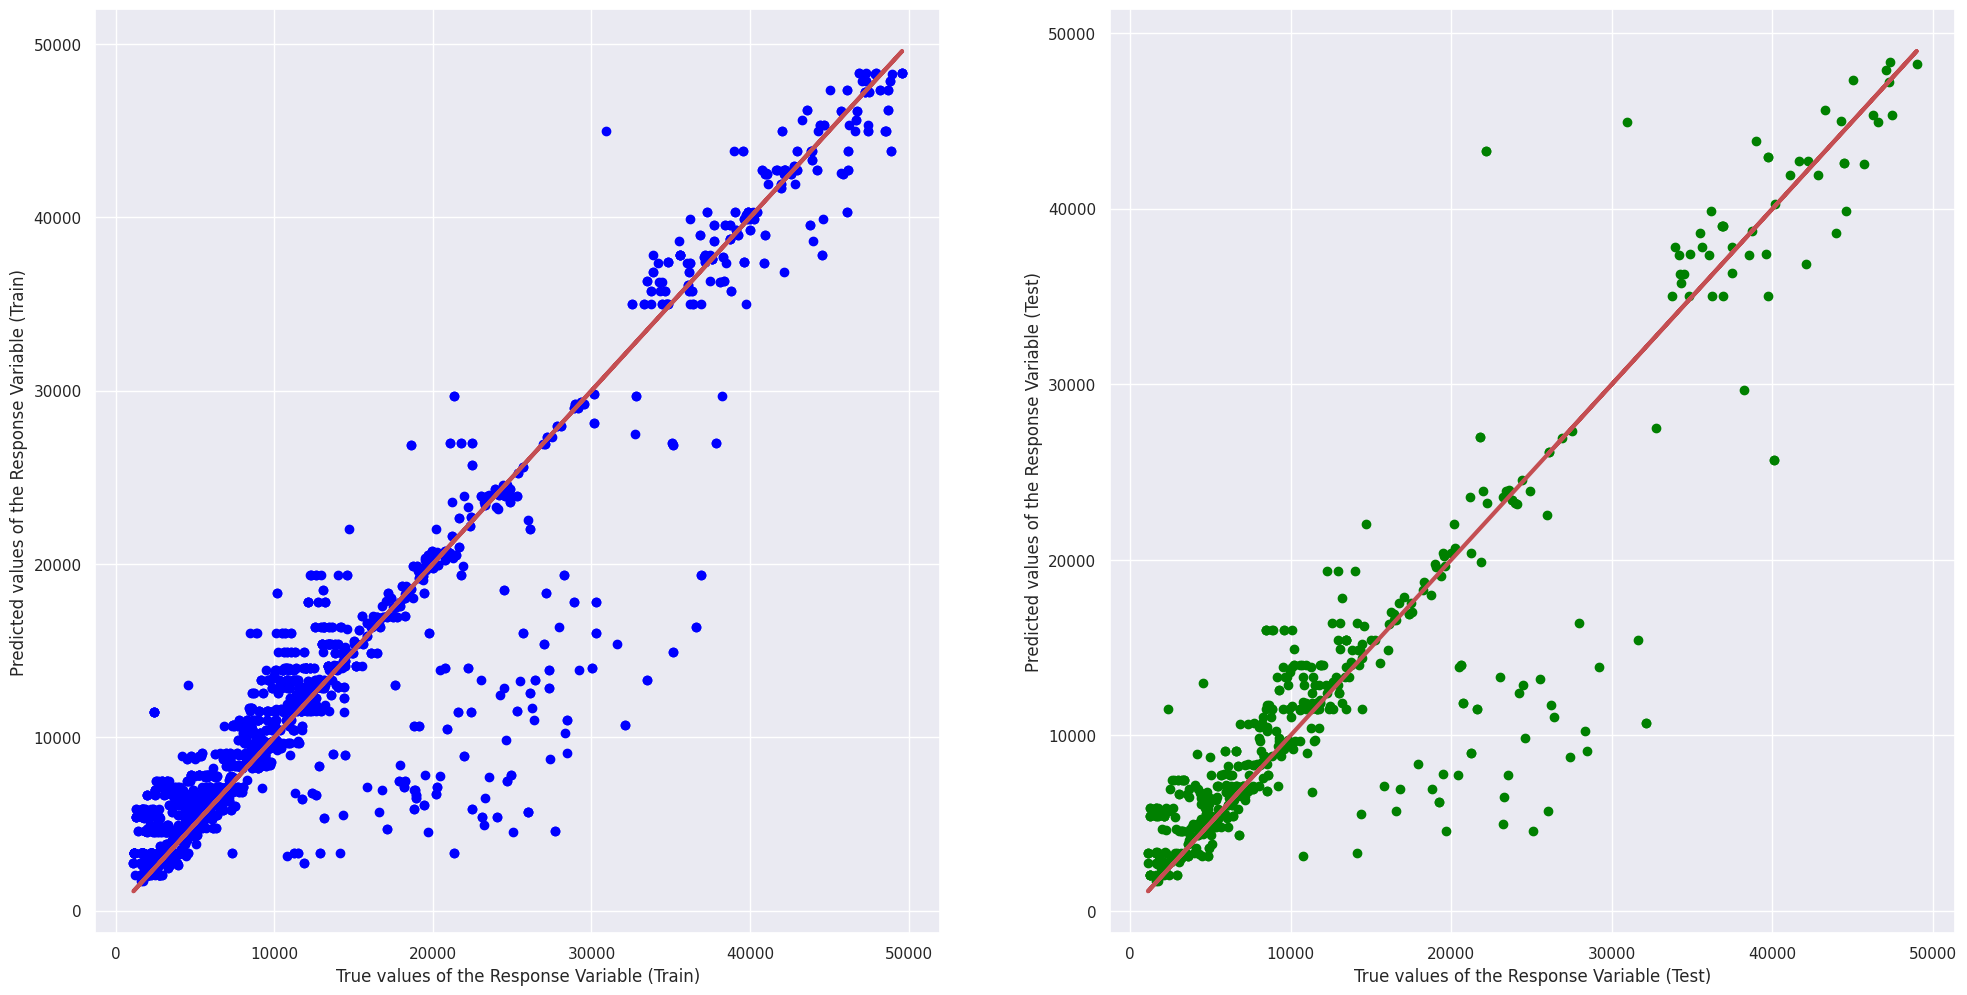

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train_2, y_train_2.values.ravel())

# Predict on the training set and the test set
y_2_train_pred_rf = random_forest_model.predict(X_train_2)
y_2_test_pred_rf = random_forest_model.predict(X_test_2)

# Calculate the mean squared error
mse_2_train_rf = mean_squared_error(y_train_2, y_2_train_pred_rf)
mse_2_test_rf = mean_squared_error(y_test_2, y_2_test_pred_rf)

# Calculate the coefficient of determination (R^2)
r2_2_train_rf = r2_score(y_train_2, y_2_train_pred_rf)
r2_2_test_rf = r2_score(y_test_2, y_2_test_pred_rf)

# Print out the metrics
print(f'Train MSE: {mse_2_train_rf}')
print(f'Train R^2: {r2_2_train_rf}')
print(f'Test MSE: {mse_2_test_rf}')
print(f'Test R^2: {r2_2_test_rf}')

# Visualizing the results with scatter plots
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_2_train_pred_rf, color = "blue")
axes[0].plot(y_train_2, y_train_2, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_2_test_pred_rf, color = "green")
axes[1].plot(y_test_2, y_test_2, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

From both the graph and the statistcs such as explained variance and mean squared error, we can observe a very good fit of the random forest regressor model in the medical insurance charges prediction.

In [ ]:
for n in range(100, 501, 100):
    random_forest_model = RandomForestRegressor(n_estimators=n, random_state=42)
    # Fit the model on the training data
    random_forest_model.fit(X_train_2, y_train_2.values.ravel())

    # Predict on the training set and the test set
    y_2_train_pred_rf = random_forest_model.predict(X_train_2)
    y_2_test_pred_rf = random_forest_model.predict(X_test_2)

    # Calculate the mean squared error
    mse_2_train_rf = mean_squared_error(y_train_2, y_2_train_pred_rf)
    mse_2_test_rf = mean_squared_error(y_test_2, y_2_test_pred_rf)

    # Calculate the coefficient of determination (R^2)
    r2_2_train_rf = r2_score(y_train_2, y_2_train_pred_rf)
    r2_2_test_rf = r2_score(y_test_2, y_2_test_pred_rf)

    # Print out the metrics
    print("Number of trees:", n)
    print(f'Train MSE: {mse_2_train_rf}')
    print(f'Train R^2: {r2_2_train_rf}')
    print(f'Test MSE: {mse_2_test_rf}')
    print(f'Test R^2: {r2_2_test_rf}')

Number of trees: 100
Train MSE: 16028297.36494949
Train R^2: 0.8865038204138517
Test MSE: 21875191.174514957
Test R^2: 0.8254716161686952
Number of trees: 200
Train MSE: 16018880.135547925
Train R^2: 0.8865705037012295
Test MSE: 21939408.858594842
Test R^2: 0.8249592636810558
Number of trees: 300
Train MSE: 16014959.457652638
Train R^2: 0.8865982659739382
Test MSE: 21926252.350356296
Test R^2: 0.8250642311806043
Number of trees: 400
Train MSE: 16015175.0363473
Train R^2: 0.8865967394638113
Test MSE: 21881511.751577668
Test R^2: 0.8254211882619933
Number of trees: 500
Train MSE: 16015635.245286085
Train R^2: 0.8865934807298876
Test MSE: 21885847.902133636
Test R^2: 0.8253865928455443


Random forest regressor combines the output of multiple decision trees to reach a single result. The number of tree is passed in to the function as n_estimator. Ideally, the increase in the number of tree will result in better R^2 and MSE. Similar to polynomial regression, we attempted different n_estimator and observed similar R^2 and MSE. When considering memory allocation and efficiency of our model, we think that a simpler model (i.e. with a lower n_estimator) is more appropriate for carrying out regression.

---

## **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

Train MSE: 17941593.873749845
Train R^2: 0.8729557909993724
Test MSE: 21574466.03874578
Test R^2: 0.8278709127739011


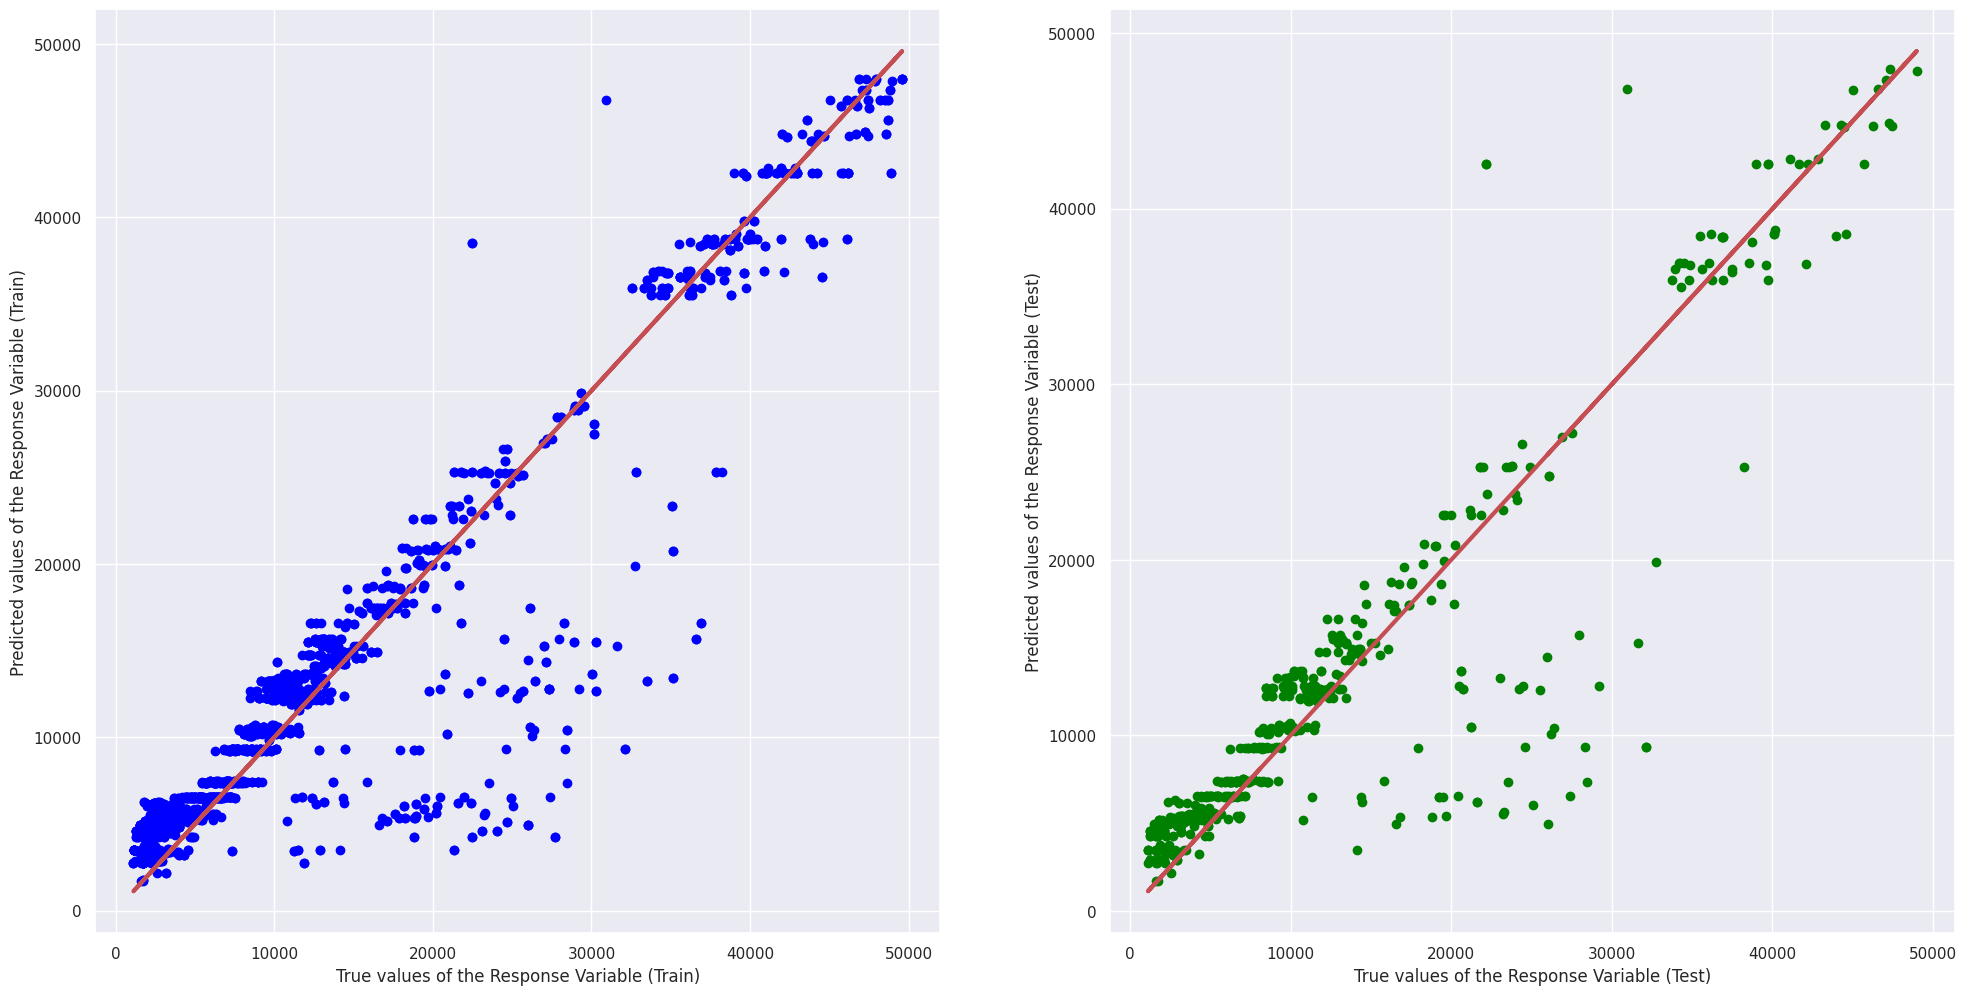

In [ ]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_2, y_train_2.values.ravel())

# Predict on the training set and the test set
y_2_train_pred_gbr = gbr_model.predict(X_train_2)
y_2_test_pred_gbr = gbr_model.predict(X_test_2)

# Calculate the mean squared error
mse_2_train_gbr = mean_squared_error(y_train_2, y_2_train_pred_gbr)
mse_2_test_gbr = mean_squared_error(y_test_2, y_2_test_pred_gbr)

# Calculate the coefficient of determination (R^2)
r2_2_train_gbr = r2_score(y_train_2, y_2_train_pred_gbr)
r2_2_test_gbr = r2_score(y_test_2, y_2_test_pred_gbr)

# Print out the metrics
print(f'Train MSE: {mse_2_train_gbr}')
print(f'Train R^2: {r2_2_train_gbr}')
print(f'Test MSE: {mse_2_test_gbr}')
print(f'Test R^2: {r2_2_test_gbr}')

# Visualizing the results with scatter plots
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_2_train_pred_gbr, color = "blue")
axes[0].plot(y_train_2, y_train_2, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_2_test_pred_gbr, color = "green")
axes[1].plot(y_test_2, y_test_2, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


### **RandomizedSearchCV**


In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': np.arange(3, 10),
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train_2, y_train_2.values.ravel())

# Get the best parameters and best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random = best_model_random.predict(X_test_2)

# Calculate the mean squared error
mse_2_test_gbr = mean_squared_error(y_test_2, y_pred_best_random)

# Calculate the coefficient of determination (R^2)
r2_2_test_gbr = r2_score(y_test_2, y_pred_best_random)

# Print the results
print("Best Parameters (Randomized Search):", best_params_random)

# Print out the metrics
print(f'Test MSE: {mse_2_test_gbr}')
print(f'Test R^2: {r2_2_test_gbr}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters (Randomized Search): {'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.17}
Test MSE: 21358222.92462013
Test R^2: 0.829596180494851


We make use of the Randomised Search Cross Validation algorithm which sample hyperparameters from the parameter grid provided. The algorithm will then output the ideal parameter combination which produces the best fitness for the model.

Train MSE: 16734184.51105924
Train R^2: 0.8815054420784446
Test MSE: 21358222.92462013
Test R^2: 0.829596180494851


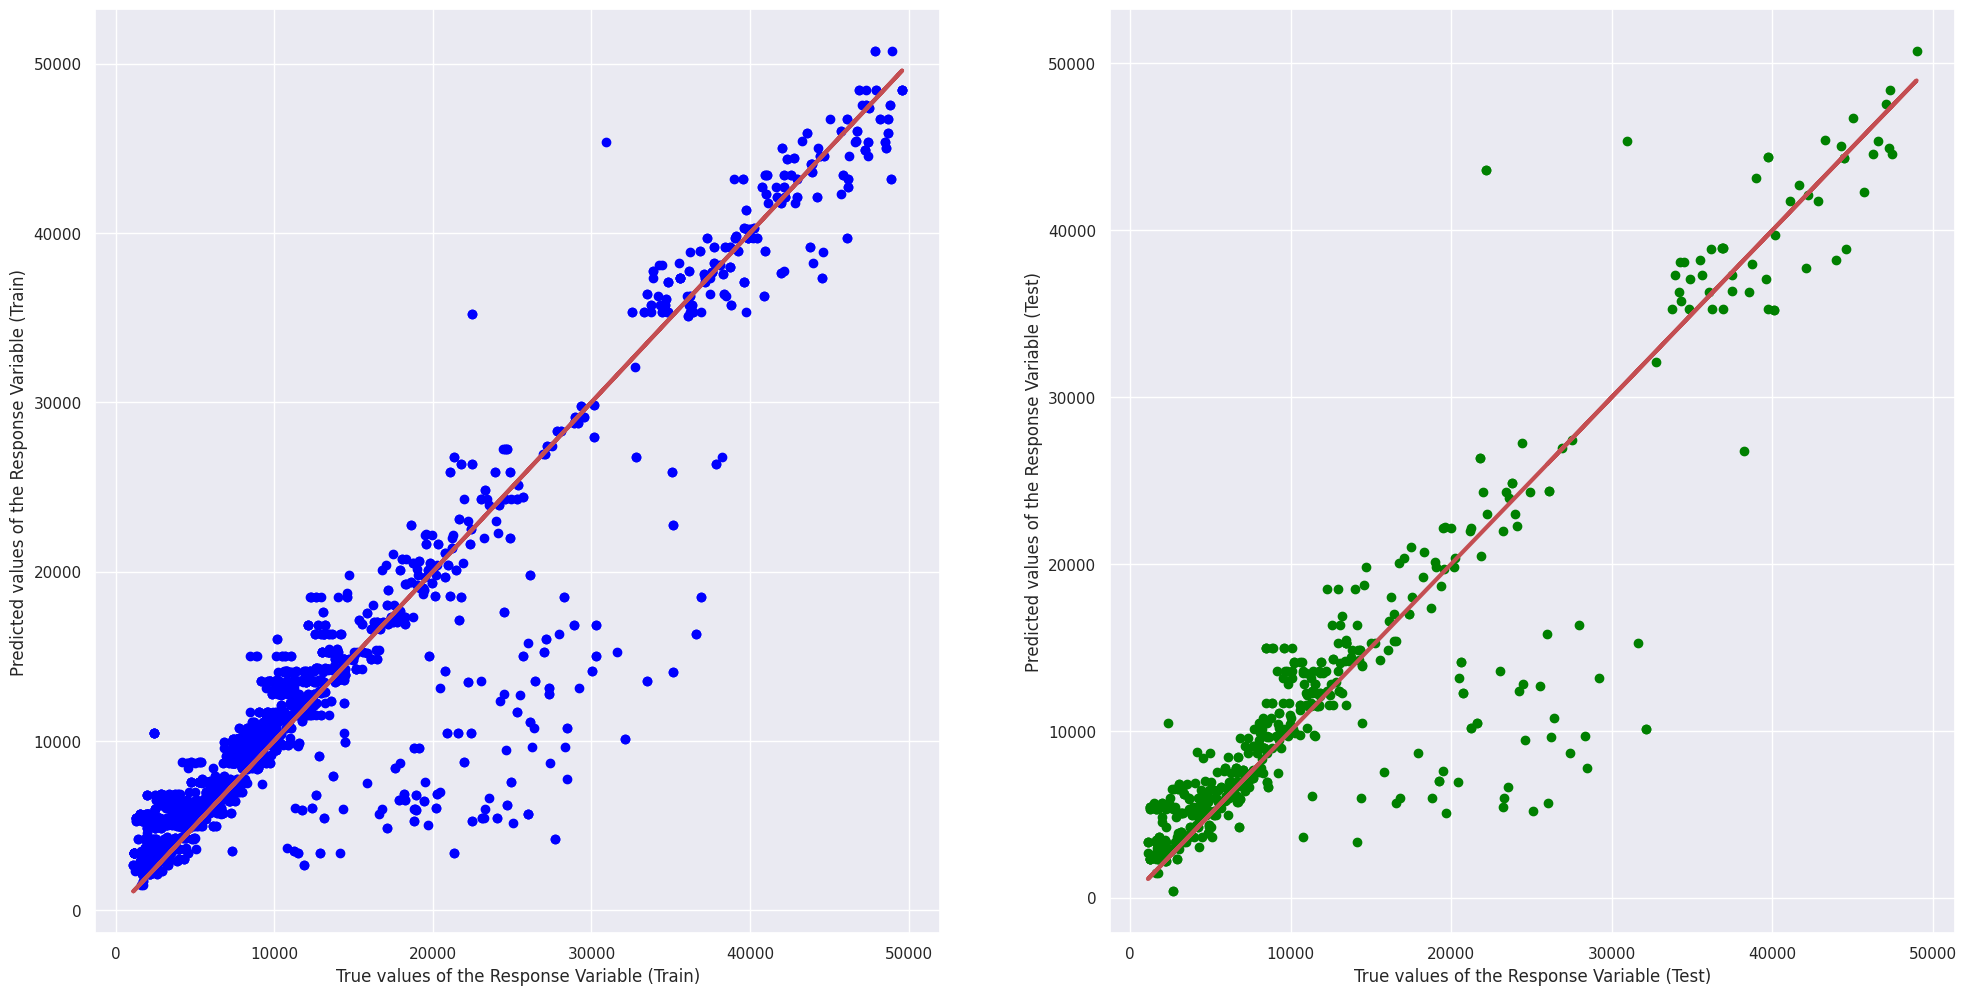

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators = 350, max_depth = 3, learning_rate = 0.17)
gbr_model.fit(X_train_2, y_train_2.values.ravel())

# Predict on the training set and the test set
y_2_train_pred_gbr = gbr_model.predict(X_train_2)
y_2_test_pred_gbr = gbr_model.predict(X_test_2)

# Calculate the mean squared error
mse_2_train_gbr = mean_squared_error(y_train_2, y_2_train_pred_gbr)
mse_2_test_gbr = mean_squared_error(y_test_2, y_2_test_pred_gbr)

# Calculate the coefficient of determination (R^2)
r2_2_train_gbr = r2_score(y_train_2, y_2_train_pred_gbr)
r2_2_test_gbr = r2_score(y_test_2, y_2_test_pred_gbr)

# Print out the metrics
print(f'Train MSE: {mse_2_train_gbr}')
print(f'Train R^2: {r2_2_train_gbr}')
print(f'Test MSE: {mse_2_test_gbr}')
print(f'Test R^2: {r2_2_test_gbr}')

# Visualizing the results with scatter plots
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_2, y_2_train_pred_gbr, color = "blue")
axes[0].plot(y_train_2, y_train_2, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_2, y_2_test_pred_gbr, color = "green")
axes[1].plot(y_test_2, y_test_2, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


After applying the tuned parameters, the fitness of the model increased as the MSE decreases and R^2 increases.

---


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
medIn_cleaned_copy = medIn_cleaned.copy()

# Mapping 'female' to 1 and 'male' to 0 for 'sex' column
medIn_cleaned_copy['sex'] = medIn_cleaned_copy['sex'].map({'female': 1, 'male': 0})

print(medIn_cleaned_copy.head())

   age  sex     bmi  healthyweight  children smoker  smokerstatus     region  \
0   19    1  27.900              2         0    yes             1  southwest   
1   18    0  33.770              3         1     no             0  southeast   
2   28    0  33.000              3         3     no             0  southeast   
3   33    0  22.705              1         0     no             0  northwest   
4   32    0  28.880              2         0     no             0  northwest   

       charges  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520  


### **Sex, whether they smoke, their weight category, age, and no. of children as predictors**

In [ ]:
# Define the threshold for 'high' charges as the 75th percentile of the 'charges' distribution
charges_threshold = medIn_cleaned_copy['charges'].quantile(0.75)

# Create a binary target variable based on the threshold
medIn_cleaned_copy['high_charges'] = (medIn_cleaned_copy['charges'] > charges_threshold).astype(int)

# Define the feature matrix and target vector
X_5 = medIn_cleaned_copy[['sex','smokerstatus','healthyweight', 'age', 'children']]
y_5 = medIn_cleaned_copy['high_charges']

# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg_5 = LogisticRegression(max_iter=1000, random_state = 42)
log_reg_5.fit(X_train_5, y_train_5)

# Make predictions on the test set
y_pred_5 = log_reg_5.predict(X_test_5)

# Evaluate the model
accuracy_5 = accuracy_score(y_test_5, y_pred_5)
conf_matrix_5 = confusion_matrix(y_test_5, y_pred_5)
class_report_5 = classification_report(y_test_5, y_pred_5)

# Output the evaluation metrics
print("Accuracy:", accuracy_5)
print("\nConfusion Matrix:")
print(conf_matrix_5)
print("\nClassification Report:")
print(class_report_5)

Accuracy: 0.9148550724637681

Confusion Matrix:
[[409   8]
 [ 39  96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       417
           1       0.92      0.71      0.80       135

    accuracy                           0.91       552
   macro avg       0.92      0.85      0.87       552
weighted avg       0.92      0.91      0.91       552



In [ ]:
print(charges_threshold)

16281.596249999999


**Legend:**
- Class 0 : Not high charges
- Class 1 : High charges

<br>

**Accuracy:** The overall accuracy of model is 0.915 (3 d.p.), meaning that approximately 91.5% of predictions are correct.

<br>

**Support:** Indicates the number of instances for each class in the test data.

<br>

**Confusion Matrix:**
- True Negatives (TN) = 409: The model correctly predicted 'not high charges' 409 times.
- False Positives (FP) = 8: The model incorrectly predicted 'high charges' 8 times when they were actually not.
- False Negatives (FN) = 39: The model incorrectly predicted 'not high charges' 39 times when they were actually high.
- True Positives (TP) = 96: The model correctly predicted 'high charges' 96 times.

<br>

It can be inferred that the model is strong at identifying the negative class ('not high charges') but slightly weaker at identifying all the positive instances ('high charges'), as shown by the higher number of false negatives compared to false positives.

<br>

**Prediction Rates (3 d.p.):**
- True Positive Rate (TPR): 0.711
- False Positive Rate (FPR): 0.019
- True Negative Rate (TNR): 0.981
- False Negative Rate (FNR): 0.289

<br>

Overall, prediction TRP and TNR are high, whereas FPR is considerably low and FNR is relatively low. This aligns with the high prediction accuracy of 0.915.

<br>

**Classification Report:**

**Not high charges**
- Precision for Class 0 (Not High Charges): 91%
When the model predicts 'not high charges', it is correct 91% of the time.
- Recall for Class 0 (Not High Charges): 98%
The model successfully identifies 98% of all true 'not high charges' cases.
- F1-Score (balance between precision and recall) for Class 0: 95%
F1-score is very high for Class 0, indicating strong performance for this class.


**High charges**
- Precision for Class 1 (High Charges): 92%
When the model predicts 'high charges', it is correct 92% of the time.
- Recall for Class 1 (High Charges): 71%
The model identifies 71% of all true 'high charges' cases, a weaker precision to identify 'high charges case'.
- F1-Score for Class 1: 80%
F1-score is lower for Class 1 than for Class 0, suggesting that balance precision of Class 1 is not as strong as Class 0.

<br>

**Summary:**

Model performs well overall with high accuracy and precision and recall for predicting 'not high charges'. However, the recall for 'high charges' indicates that the model fails to identify a certain number of cases where charges are high.

---


## **Conclusion**

### **Final Insights and Views**



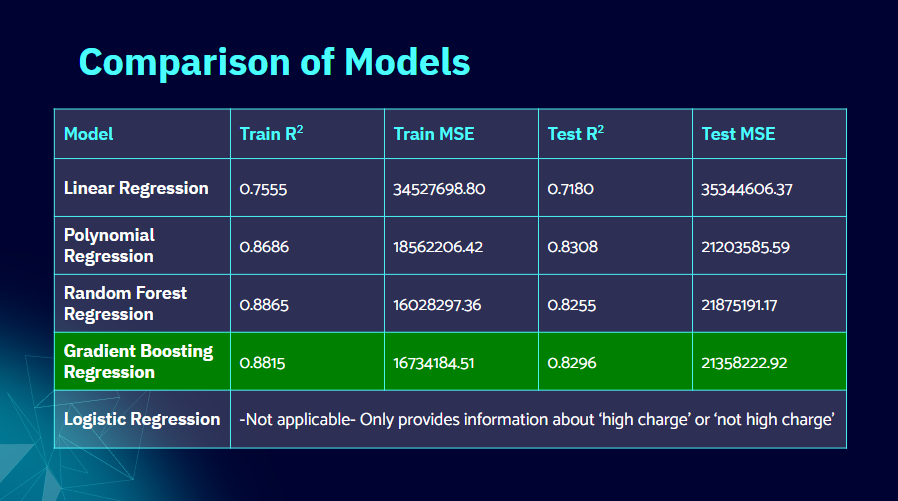

After applying various machine learning models, we believe that gradient boosting regression provides the most accurate prediction with the least tradeoffs (i.e. uncertainty) for insurance costs. This is supported by its high coefficients of determination (R^2 values) and low MSE values. Gradient boosting bregression strikes a balance between polynomial regression and random forest regression, which we believe produces the most balanced model. Thus, we have successfully created a model to answer our problem statement, allowing people to make more informed decisions when purchasing insurance premiums in the US.

### **Learning Outcomes**

Through this project, we were able to experience practical applications of data science skills through hands-on analysis of a real-world dataset, which strengthened our foundations in data science and machine learning. Aside from revising and applying our classroom learning, we also challenged ourselves to explore other data science methods outside of our syllabus, such as model-tuning in machine learning, random forest regression, polynomial regression, gradient boosting regression, and logistic regression. Moreover, we improved upon our collaborative and communication skills by working together in a team. This was accomplished through effective task delegation, and coordination of our efforts to reach a common goal. All in all, the project was a fruitful experience with many takeaways for us.